# **ECOMMERCE CUSTOMER CHURN ANALYSIS & PREDICTION**

**Group 5 - HERMES**<br>
Members: <br>
1. Dwi Susanto <br>
2. Mhd Fahmi Aziz <br>
3. Nur Ayu Asyifa <br>
4. Andre Yudha Priyadi<br>
5. Raden Roro Intan Dwi Nuraini

**About the dataset:**</br>
The data set belongs to a leading online E-Commerce company. An online retail (E commerce) company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.

https://www.kaggle.com/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction 

**Step-by-step :**

1.   Data Cleaning (Handling missing values, duplicates & outliers)<br>
2.   Exploratory Data Analysis/EDA<br>
3.   Data Preparation (Feature Engineering, Selection, Standardization)<br>
4.   Modelling






**First thing first, import libraries**

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True
import plotly.offline as po
import plotly.graph_objects as go
%matplotlib inline

print('Numpy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Seaborn version:', sns.__version__)

Numpy version: 1.23.0
Pandas version: 1.4.3
Seaborn version: 0.11.2


In [6]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 5
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# **1. DATA CLEANING**

In [8]:
df = pd.read_excel('E Commerce Dataset.xlsx')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [9]:
df.shape

(5630, 20)

In [10]:
# Aggregate Churn Rate by Total Customer
df_churn_percentage = df.groupby('Churn').agg(Population = ('Churn','count'))
df_churn_percentage.reset_index(inplace=True)

df_churn_percentage['%Churn'] = round(100 * df_churn_percentage['Population']/df_churn_percentage['Population'].sum(), 2)

df_churn_percentage

,Churn,Population,%Churn
0,0,4682,83.16
1,1,948,16.84


In [11]:
# Visualize Total Customer Churn
plot_churn_labels = df["Churn"].value_counts().keys().tolist()
plot_churn_values = df["Churn"].value_counts().values.tolist()

plot_data_churn = [go.Pie(labels = plot_churn_labels,
                          values = plot_churn_values,
                          marker = dict(colors = ['cornflowerblue', 'crimson'],
                                        line = dict(color = "white",
                                                    width = 1.5)),
                          rotation = 90,
                          hoverinfo = "label+value+text",
                          hole = 0.6)
                   ]
plot_layout = go.Layout(dict(title = "Customer Churn",
                             plot_bgcolor = "rgb(243,243,243)",
                             paper_bgcolor = "rgb(243,243,243)"))

fig = go.Figure(data = plot_data_churn, layout = plot_layout)
po.iplot(fig)

In [12]:
plot_churn_labels

[0, 1]

In [13]:
plot_churn_values

[4682, 948]

## a. Handling Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [14]:
# Rename Column, make it simpler
df = df.rename(columns={'PreferredPaymentMode': 'PayMethod',
                        'MaritalStatus': 'Status',
                        'PreferredLoginDevice': 'LoginDevice',
                        'PreferedOrderCat': 'OrderCat',
                        'NumberOfDeviceRegistered' : 'DeviceRegistered',
                        'CashbackAmount' : 'Cashback',
                        'OrderAmountHikeFromlastYear' : '%IncreaseOrderLY'})

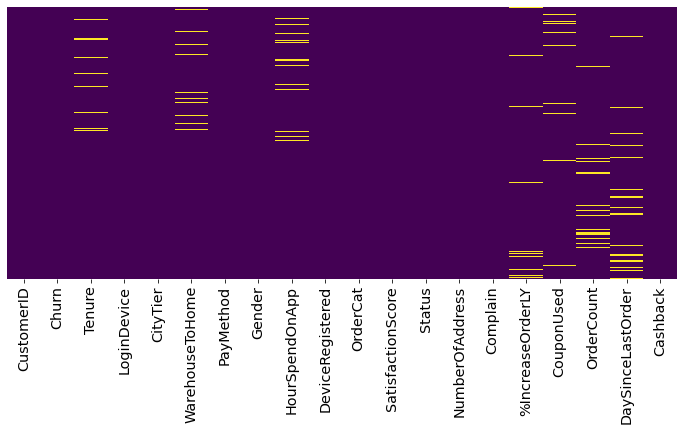

In [15]:
# Detect Null Values of Each Columns
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

In [ ]:
df.isnull().sum()

CustomerID             0
Churn                  0
Tenure               264
LoginDevice            0
CityTier               0
WarehouseToHome      251
PayMethod              0
Gender                 0
HourSpendOnApp       255
DeviceRegistered       0
OrderCat               0
SatisfactionScore      0
Status                 0
NumberOfAddress        0
Complain               0
%IncreaseOrderLY     265
CouponUsed           256
OrderCount           258
DaySinceLastOrder    307
Cashback               0
dtype: int64

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.0,0.00,1.0
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.0,16.00,61.0
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.0,3.00,3.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.0,20.00,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.0,3.00,5.0
DeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.0,4.00,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.0,4.00,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.0,6.00,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.0,1.00,1.0


In order to make the data more robust, values in the column that contains NULL: `Tenure`, `WarehouseToHome`, `HourSpendOnApp`, `%IncreaseOrderLY`, `CouponUsed`, `OrderCount`, and `DaySinceLastOrder` need to be replaced by median, since the distribution is positively skewed (median > mean) 

In [ ]:
# Fill Null Value - Imputation
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median(), inplace=True)
df['%IncreaseOrderLY'].fillna(df['%IncreaseOrderLY'].median(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(), inplace=True)
df['OrderCount'].fillna(df['OrderCount'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)

In [ ]:
# Recheck Null Value
df.isnull().sum()

CustomerID           0
Churn                0
Tenure               0
LoginDevice          0
CityTier             0
WarehouseToHome      0
PayMethod            0
Gender               0
HourSpendOnApp       0
DeviceRegistered     0
OrderCat             0
SatisfactionScore    0
Status               0
NumberOfAddress      0
Complain             0
%IncreaseOrderLY     0
CouponUsed           0
OrderCount           0
DaySinceLastOrder    0
Cashback             0
dtype: int64

## b. Remove Duplicates (if any)

In [ ]:
# Is there any duplicates?
df.duplicated().sum()

0

In [ ]:
#Drop CustomerID
#df.drop(columns = 'CustomerID', inplace=True)

In [ ]:
#Is there any duplicates after drop CustomerID?
#print('Total row with duplicated data = ', df.shape[0])
#print('Total duplicated data = ', df.duplicated().sum())
#Drop duplicated data
#df.drop_duplicates(inplace=True)
#print('Total row after drop duplicated data = ', df.shape[0])
#print('Total duplicated data = ', df.duplicated().sum())

**Need check unusual/similar value in each column**

In [ ]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'LoginDevice', 'CityTier',
       'WarehouseToHome', 'PayMethod', 'Gender', 'HourSpendOnApp',
       'DeviceRegistered', 'OrderCat', 'SatisfactionScore', 'Status',
       'NumberOfAddress', 'Complain', '%IncreaseOrderLY', 'CouponUsed',
       'OrderCount', 'DaySinceLastOrder', 'Cashback'],
      dtype='object')

In [ ]:
df['CityTier']=df['CityTier'].astype('object')

In [22]:
# Split data into numerical and categorical
nums = ['Churn','Tenure','DeviceRegistered','SatisfactionScore','Complain','DaySinceLastOrder','Cashback',
        'WarehouseToHome','NumberOfAddress','HourSpendOnApp','%IncreaseOrderLY','CouponUsed','OrderCount']
cats = ['LoginDevice','CityTier','PayMethod','Gender','OrderCat','Status']

In [21]:
df_halfclean = df.copy()

In [23]:
# Value Counting of Each Categorical-type Column
for col in cats:
    print(f'''Value count column {col}:''')
    print(df_halfclean[col].value_counts())
    print('---'*10, '\n')

Value count column LoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: LoginDevice, dtype: int64
------------------------------ 

Value count column CityTier:
1    3666
3    1722
2     242
Name: CityTier, dtype: int64
------------------------------ 

Value count column PayMethod:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PayMethod, dtype: int64
------------------------------ 

Value count column Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64
------------------------------ 

Value count column OrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: OrderCat, dtype: int64
------------------------------ 

Value count column Status:
Married     2986
Single      1796
Divorced     848
Nam

Unusual/similar data is found in column</br>
`LoginDevice` : Mobile Phone & Phone</br>
`PayMethod` : CC & Credit Card, COD & Cash on delivery</br>
`OrderCat` : Mobile Phone & Mobile

In [24]:
# Replace values in column
df_halfclean['PayMethod'].replace({"Credit Card": "CC", "Cash on Delivery": "COD"}, inplace=True)
df_halfclean['LoginDevice'].replace({"Mobile Phone": "Phone"}, inplace=True)
df_halfclean['OrderCat'].replace({"Mobile Phone": "Phone", "Mobile": "Phone", "Laptop & Accessory": "Laptop&Acc"}, inplace=True)

In [25]:
# Recheck is there duplicated data after replacing similar/unusual value
#print('Total duplicated data = ',df_halfclean.duplicated().sum())
#print('Total row with duplicated data = ',df_halfclean.shape[0])
#df_halfclean.drop_duplicates(inplace=True)
#print('Total duplicated data = ',df_halfclean.duplicated().sum())
#print('Total row after drop duplicated data = ',df_halfclean.shape[0])

In [26]:
# Recheck After Replacing Similar/Unusual Value
for col in cats:
    print(f'''Value count column {col}:''')
    print(df_halfclean[col].value_counts())
    print('---'*10, '\n')

Value count column LoginDevice:
Phone       3996
Computer    1634
Name: LoginDevice, dtype: int64
------------------------------ 

Value count column CityTier:
1    3666
3    1722
2     242
Name: CityTier, dtype: int64
------------------------------ 

Value count column PayMethod:
Debit Card    2314
CC            1774
E wallet       614
COD            514
UPI            414
Name: PayMethod, dtype: int64
------------------------------ 

Value count column Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64
------------------------------ 

Value count column OrderCat:
Phone         2080
Laptop&Acc    2050
Fashion        826
Grocery        410
Others         264
Name: OrderCat, dtype: int64
------------------------------ 

Value count column Status:
Married     2986
Single      1796
Divorced     848
Name: Status, dtype: int64
------------------------------ 



## c. Handling Outliers

In [27]:
#nums1 tanpa kolom 'Churn'
nums1 = ['Tenure','DeviceRegistered','SatisfactionScore','DaySinceLastOrder','Cashback',
        'WarehouseToHome','NumberOfAddress','HourSpendOnApp','%IncreaseOrderLY','CouponUsed','OrderCount']

In [28]:
# Check Statistical Descriptive before handling outliers
df_halfclean[nums1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
DeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
DaySinceLastOrder,5323.0,4.543491,3.654433,0.0,2.00,3.00,7.0000,46.00
Cashback,5630.0,177.223030,49.207036,0.0,145.77,163.28,196.3925,324.99
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
%IncreaseOrderLY,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5374.0,1.751023,1.894621,0.0,1.00,1.00,2.0000,16.00


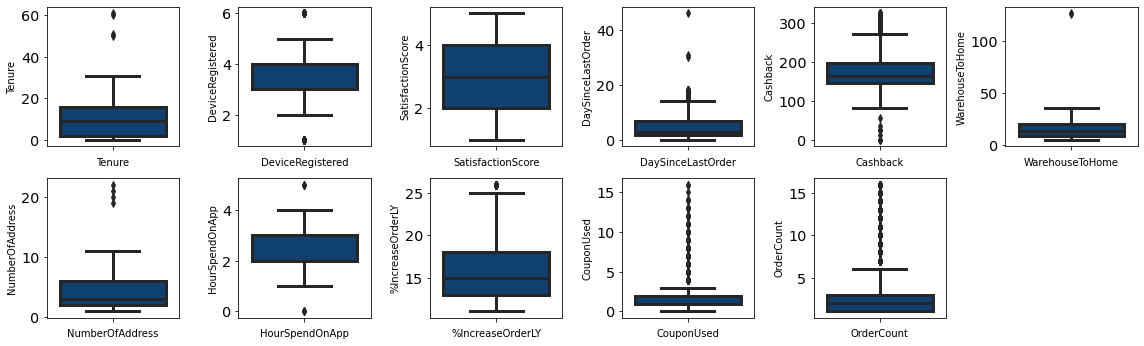

In [35]:
plt.figure(figsize=(16, 7))
for i in range(0, len(nums1)):
    plt.subplot(3, 6, i+1)
    sns.boxplot(y=df_halfclean[nums1[i]], palette='ocean')
    plt.xlabel(nums1[i])
    plt.tight_layout()

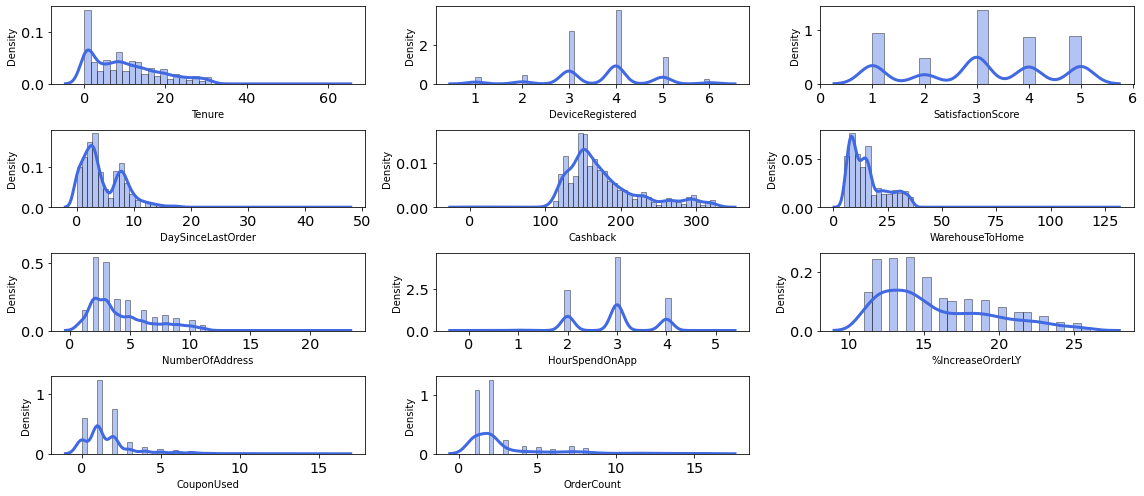

In [36]:
plt.figure(figsize=(16, 7))
for i in range(0, len(nums1)):
    plt.subplot(4, 3, i+1)
    sns.distplot(x=df_halfclean[nums1[i]], color='royalblue')
    plt.xlabel(nums1[i])
    plt.tight_layout()

In [38]:
df_clean = df_halfclean.copy()

In [39]:
# Remove Outliers
print(f'# Row before handling outliers: {len(df)}')

filtered_entries = np.array([True] * len(df_clean))
for col in df_clean[nums1].columns:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_clean[col] >= low_limit) & (df_clean[col] <= high_limit)) & filtered_entries
    
df_clean_IQR = df_clean[filtered_entries]

print(f'# Row after handling outliers: {len(df_clean_IQR)}')

# Row before handling outliers: 5630
# Row after handling outliers: 2947


In [40]:
# Check Statistical Descriptive after handling outliers
df_clean_IQR[nums1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,2947.0,8.508992,7.611282,0.0,1.0,7.00,13.00,31.00
DeviceRegistered,2947.0,3.781473,0.817591,2.0,3.0,4.00,4.00,5.00
SatisfactionScore,2947.0,3.053275,1.382737,1.0,2.0,3.00,4.00,5.00
DaySinceLastOrder,2947.0,3.890397,2.889901,0.0,2.0,3.00,5.00,14.00
Cashback,2947.0,162.618151,19.555533,81.0,148.1,158.11,175.83,260.91
WarehouseToHome,2947.0,15.654225,8.100578,5.0,9.0,14.00,20.00,36.00
NumberOfAddress,2947.0,4.337631,2.551377,1.0,2.0,3.00,6.00,11.00
HourSpendOnApp,2947.0,2.987784,0.718668,1.0,2.0,3.00,3.00,4.00
%IncreaseOrderLY,2947.0,15.629114,3.471913,11.0,13.0,15.00,18.00,25.00
CouponUsed,2947.0,1.234815,0.808456,0.0,1.0,1.00,2.00,3.00


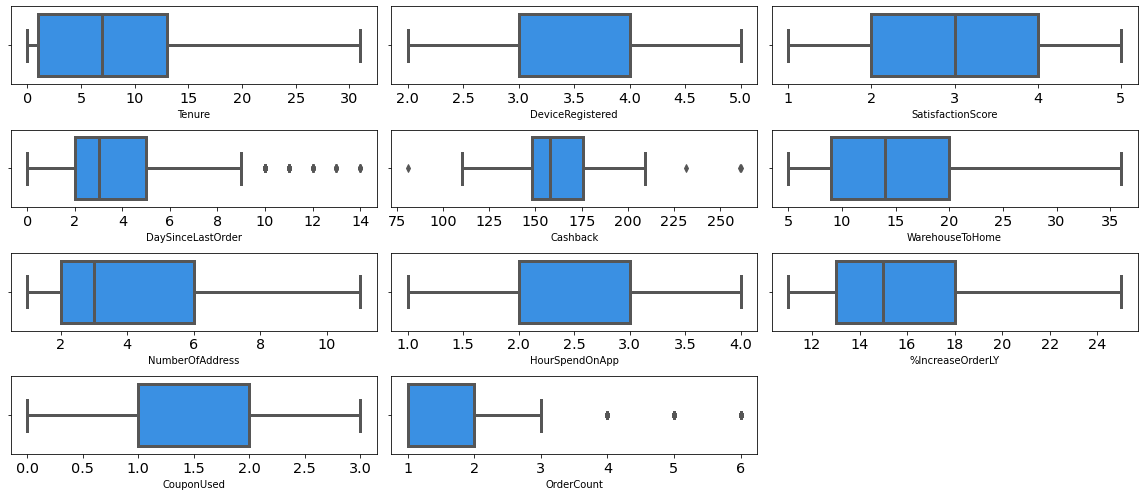

In [41]:
plt.figure(figsize=(16, 7))
for i in range(0, len(nums1)):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df_clean_IQR[nums1[i]], color='dodgerblue')
    plt.xlabel(nums1[i])
    plt.tight_layout()

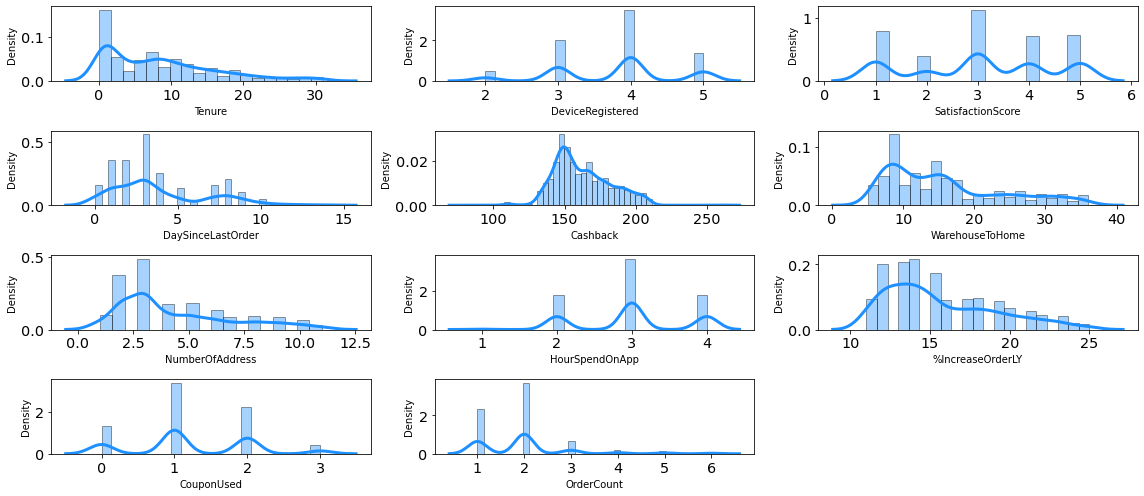

In [42]:
plt.figure(figsize=(16, 7))
for i in range(0, len(nums1)):
    plt.subplot(4, 3, i+1)
    sns.distplot(x=df_clean_IQR[nums1[i]], color='dodgerblue')
    plt.xlabel(nums1[i])
    plt.tight_layout()

**The data is cleaned, check target (churn rate) before and after cleaning**

In [43]:
# Aggregate Churn Rate by Total Customer - after data cleaning
df_churn_percentageclean = df_clean_IQR.groupby('Churn').agg(Population = ('Churn','count'))
df_churn_percentageclean.reset_index(inplace=True)

df_churn_percentageclean['%Churn'] = round(100 * df_churn_percentageclean['Population']/df_churn_percentageclean['Population'].sum(), 2)

# Compare Churn Rate before & after data cleaning
count_churn = df_churn_percentage['Population']
count_churnclean = df_churn_percentageclean['Population']

percent_churn = df_churn_percentage['%Churn'][1]
percent_churnclean = df_churn_percentageclean['%Churn'][1]

print('Churn % before data cleaning :' , percent_churn, "%", 'from total rows', len(df))
print(count_churn)
print('\n')

print('Churn % after data cleaning :' , percent_churnclean, "%", 'from total rows', len(df_clean_IQR))
print(count_churnclean)
print('\n')

Churn % before data cleaning : 16.84 % from total rows 5630
0    4682
1     948
Name: Population, dtype: int64


Churn % after data cleaning : 16.49 % from total rows 2947
0    2461
1     486
Name: Population, dtype: int64




In [45]:
# Visualize Total Customer Churn
plot_churn_labels1 = df_clean_IQR["Churn"].value_counts().keys().tolist()
plot_churn_values1 = df_clean_IQR["Churn"].value_counts().values.tolist()

plot_data_churn1 = [go.Pie(labels = plot_churn_labels1,
                          values = plot_churn_values1,
                          marker = dict(colors = ['cornflowerblue', 'crimson'],
                                        line = dict(color = "white",
                                                    width = 1.5)),
                          rotation = 90,
                          hoverinfo = "label+value+text",
                          hole = 0.6)
                   ]
plot_layout1 = go.Layout(dict(title = "Customer Churn",
                             plot_bgcolor = "rgb(243,243,243)",
                             paper_bgcolor = "rgb(243,243,243)"))

fig = go.Figure(data = plot_data_churn1, layout = plot_layout1)
po.iplot(fig)

# **2. EXPLORATORY DATA ANALYSIS (EDA)**

## a. Univariate Analysis </br>
**Data visualization of features vs target**

In [46]:
nums2 = ['Tenure','DeviceRegistered','SatisfactionScore','Complain','DaySinceLastOrder','Cashback',
        'CityTier','WarehouseToHome','NumberOfAddress','HourSpendOnApp','%IncreaseOrderLY','CouponUsed','OrderCount']

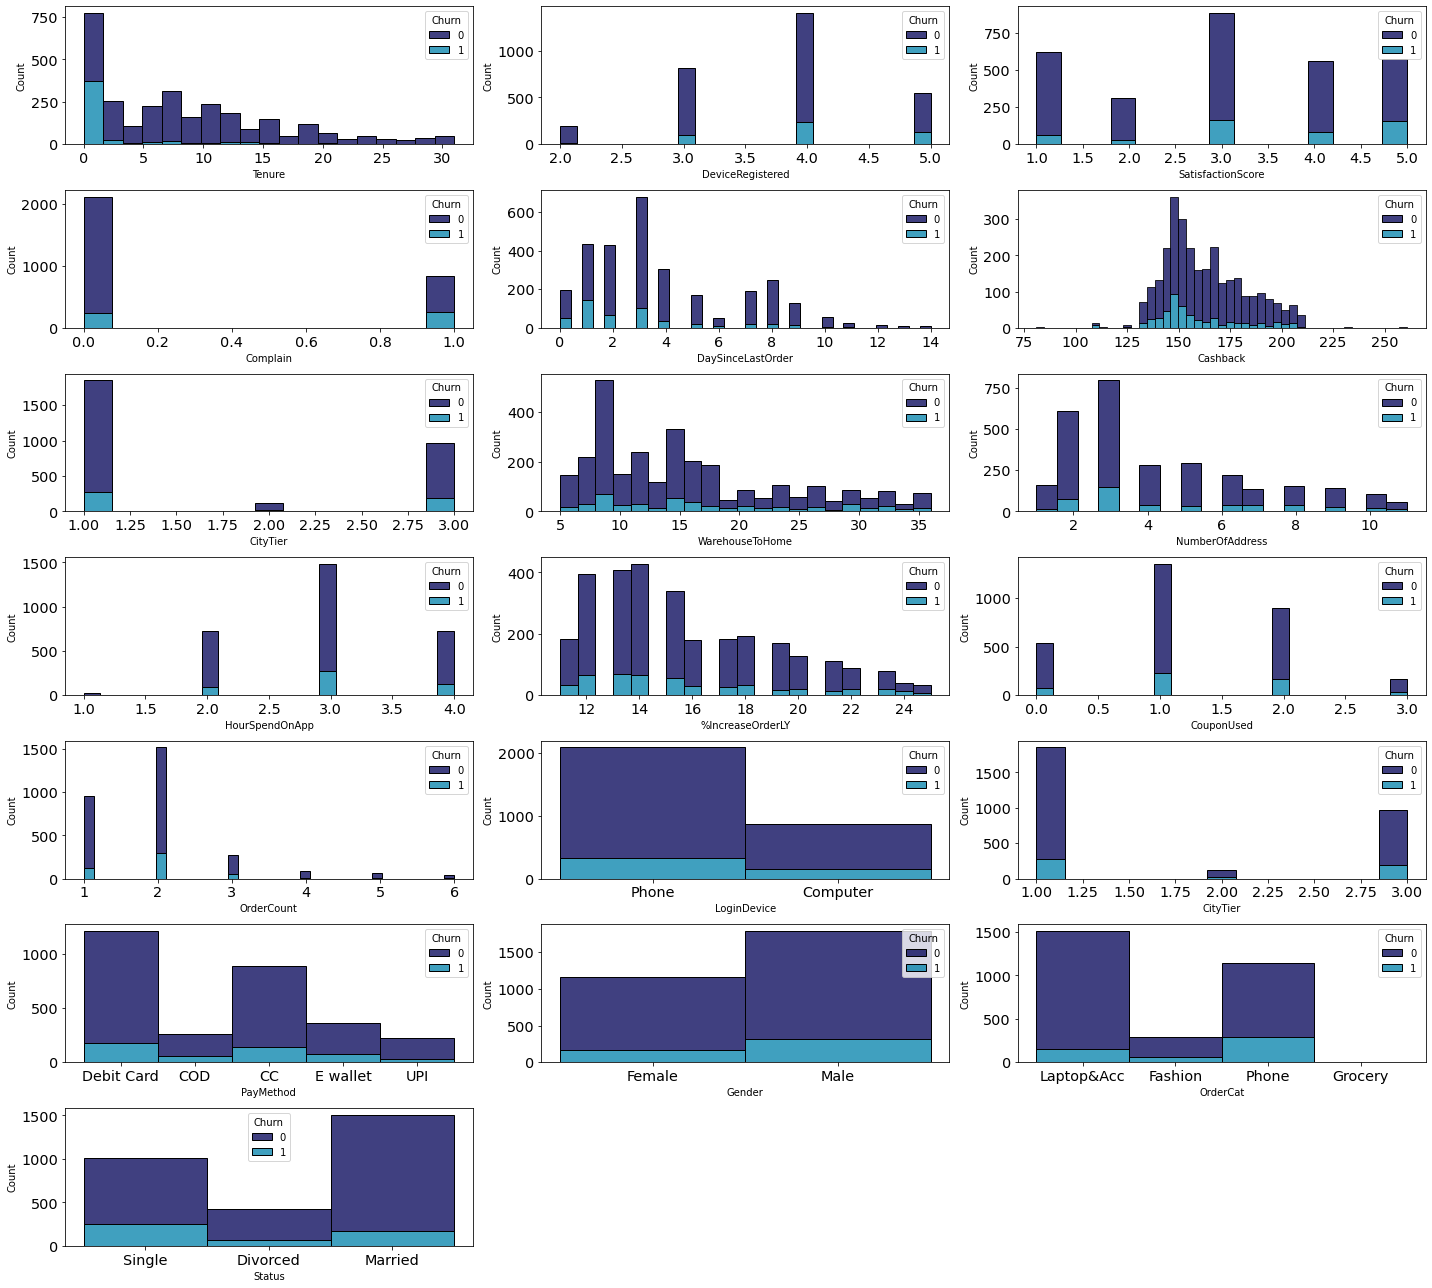

In [47]:
# All Columns vs Target
plt.figure(figsize=(20, 18))
for i, col in enumerate(df_clean_IQR[nums2+cats].columns):
    plt.subplot(7, 3, i+1)
    ax = sns.histplot(x=df_clean_IQR[col], hue=df_clean_IQR['Churn'], data=df_clean_IQR, palette='ocean', multiple='stack')
    plt.tight_layout()

## b. Multivariate Analysis</br>
**Heatmap correlation to figure out interaction between features**

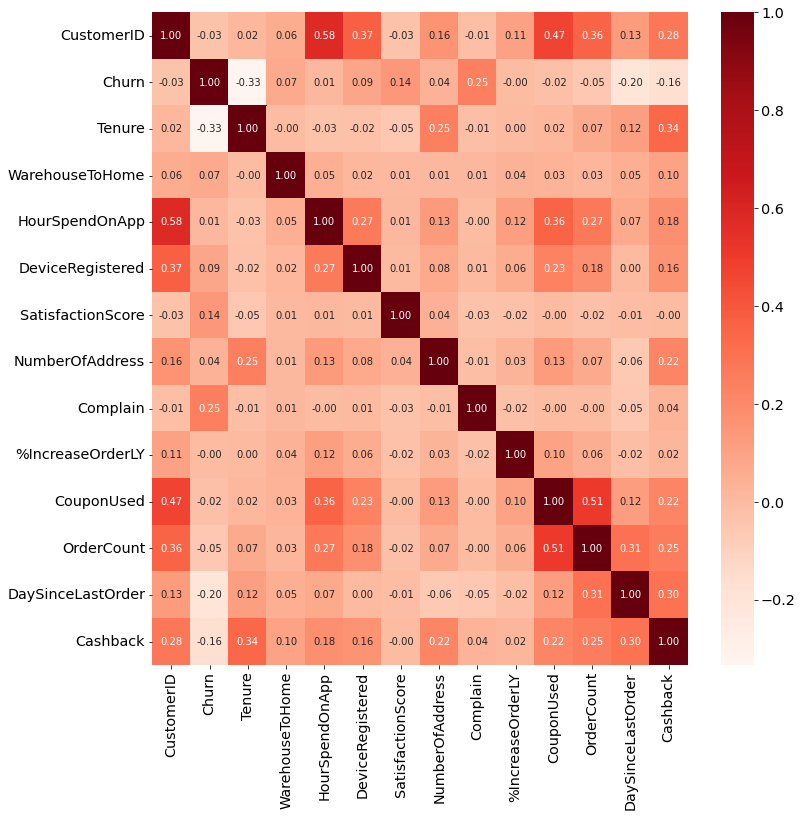

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_clean_IQR.corr(), annot=True, fmt='.2f', cmap='Reds')
plt.show()

**Analysis :**<br>
* Target Variable: `Churn`
* Weak Correlation (0.1 - 0.4) :
1. `Churn` shows negatively low correlation to  `Tenure`,`DaySinceLastOrder`, & `Cashback`
2. `Churn` shows positively low correlation to `Complain`, `DeviceRegistered`, & `SatisfactionScore`
3. `Tenure` shows positively low correlation to `NumberOfAddress`, `OrderCount`, & `DaySinceLastOrder`
4. `HourSpendOnApp` shows positively low correlation to `DeviceRegistered`, `%IncreaseOrderLY`, `OrderCount`, & `CouponUsed`
5. `CouponUsed` shows positively low correlation to `DaySinceLastOrder` & `Cashback`
6. `Tenure` shows positively low correlation to `Cashback`
7. `DaySinceLastOrder` shows positively low correlation to `OrderCount` 
* Strong Correlation (0.5 - 0.7) :
1. `CouponUsed` shows positively high correlation to `OrderCount` so one of the features must be dropped

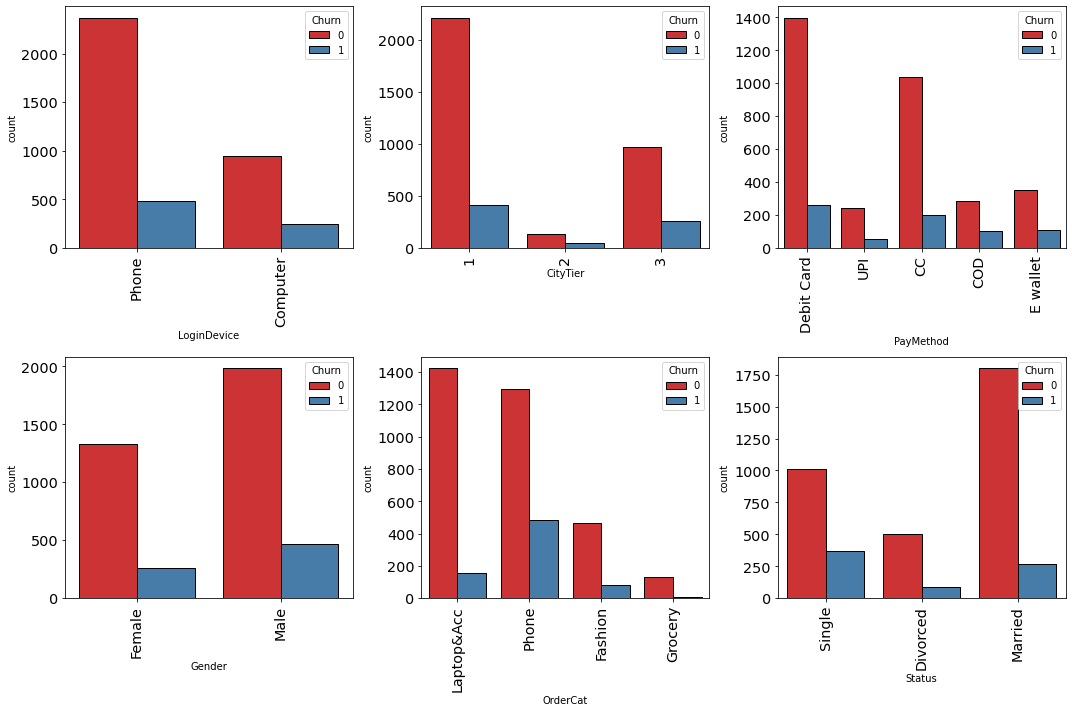

In [ ]:
# Categorical Columns vs Target
features = cats
plt.figure(figsize=(15,10))
for i in range(0, len(features)):
    plt.subplot(2,3, i+1) 
    sns.countplot(data=df_clean_IQR, hue='Churn', x=features[i], palette='Set1')
    plt.xticks(rotation=90)
    plt.xlabel(features[i])
    plt.tight_layout()

**Analysis :**
* *Male* users dominate the `Gender` column of the dataset. 
* The majority of customers in `Status` column is *married*.
* Based on `LoginDevice` & `gender` columns, there is no significant distinction between each value.
* Customer with *COD* `PayMethod` is highly potential to churn.
* Customers whose `OrderCat` is *Phone* tend to churn higher.
* A *Single* `Status` user tends to churn higher than the others.

## c. Insight (Additional)

### • Churn Rate vs Complain

In [ ]:
dfx = df_clean_IQR.copy()

In [ ]:
dfx['Complain_s'] = np.where(dfx['Complain']>0,'Yes','No')
dfx['Churn_s'] = np.where(dfx['Churn']>0,'Yes','No')
dfx.sample(5)

,CustomerID,Churn,Tenure,LoginDevice,CityTier,WarehouseToHome,PayMethod,Gender,HourSpendOnApp,DeviceRegistered,OrderCat,SatisfactionScore,Status,NumberOfAddress,Complain,%IncreaseOrderLY,CouponUsed,OrderCount,DaySinceLastOrder,Cashback,Complain_s,Churn_s
3569,53570,0,31.0,Phone,3,14.0,E wallet,Male,3.0,2,Laptop&Acc,2,Married,2,1,19.0,1.0,2.0,10.0,177,Yes,No
3440,53441,0,18.0,Phone,3,35.0,CC,Female,3.0,2,Grocery,2,Divorced,5,1,19.0,2.0,2.0,12.0,258,Yes,No
2644,52645,0,13.0,Phone,1,7.0,Debit Card,Female,2.0,3,Laptop&Acc,1,Married,5,0,17.0,0.0,1.0,3.0,165,No,No
821,50822,1,3.0,Phone,3,31.0,E wallet,Male,2.0,4,Fashion,4,Single,3,1,12.0,0.0,1.0,0.0,191,Yes,Yes
485,50486,0,0.0,Phone,1,11.0,COD,Male,2.0,4,Fashion,2,Married,2,1,16.0,0.0,1.0,3.0,228,Yes,No


In [ ]:
dfx1 = dfx.groupby(['Complain_s','Churn_s']).agg({'CustomerID':'nunique'}).reset_index()
dfx1 = dfx1.rename(columns={'CustomerID': 'UniqueCustomer'})
dfx1

,Complain_s,Churn_s,UniqueCustomer
0,No,No,2536
1,No,Yes,341
2,Yes,No,780
3,Yes,Yes,383


In [ ]:
dfx2 = dfx.groupby(['Complain_s']).agg({'CustomerID':'nunique'}).reset_index()
dfx2 = dfx2.rename(columns={'CustomerID': 'AllUniqueCustomer'})
dfx2

,Complain_s,AllUniqueCustomer
0,No,2877
1,Yes,1163


In [ ]:
dfx_grouped = dfx1.merge(dfx2,
                             left_on = 'Complain_s',
                             right_on = 'Complain_s',
                             how = 'inner')
dfx_grouped

,Complain_s,Churn_s,UniqueCustomer,AllUniqueCustomer
0,No,No,2536,2877
1,No,Yes,341,2877
2,Yes,No,780,1163
3,Yes,Yes,383,1163


In [ ]:
dfx_grouped['PercentUniqueCustomer'] = round(100.0 * dfx_grouped['UniqueCustomer']/(dfx_grouped['AllUniqueCustomer']),2)
dfx_grouped

,Complain_s,Churn_s,UniqueCustomer,AllUniqueCustomer,PercentUniqueCustomer
0,No,No,2536,2877,88.15
1,No,Yes,341,2877,11.85
2,Yes,No,780,1163,67.07
3,Yes,Yes,383,1163,32.93


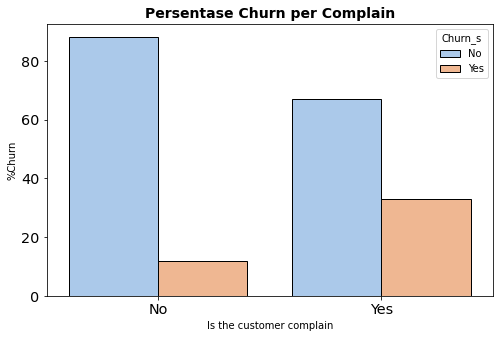

In [ ]:
# Percent Churn Based On Complain
plt.figure(figsize = (8,5))
plt.title('Persentase Churn per Complain', fontsize = 14, fontweight='bold')
ax = sns.barplot(x = 'Complain_s', y = 'PercentUniqueCustomer', 
                 data = dfx_grouped,
                 palette="pastel",
                 hue = 'Churn_s')
ax.set(xlabel='Is the customer complain', ylabel='%Churn')
ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)
sns.set(style="darkgrid")
plt.show()

**Analysis :**<br>
It can be seen from the table customer who had a complain tends to churn 3 times higher rather than those who didn't have any complains.

### • Churn Rate vs Tenure

In [ ]:
dfy = df_clean_IQR.copy()

In [ ]:
dfy = dfy.groupby(['Tenure']).agg({'Churn' : 'sum'}).reset_index()
dfy['ChurnPercent'] = round(dfy['Churn']/df['Churn'].count()*100, 2)

dfy.head()

,Tenure,Churn,ChurnPercent
0,0.0,229,4.07
1,1.0,260,4.62
2,2.0,12,0.21
3,3.0,14,0.25
4,4.0,16,0.28


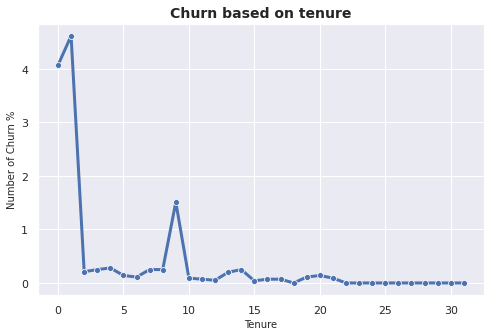

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(x= 'Tenure', y='ChurnPercent', data=dfy, lw=3, marker='o')

plt.title('Churn based on tenure', fontsize = 14, fontweight='bold')

plt.ylabel('Number of Churn %', fontsize= 10)
plt.xlabel('Tenure', fontsize= 10);

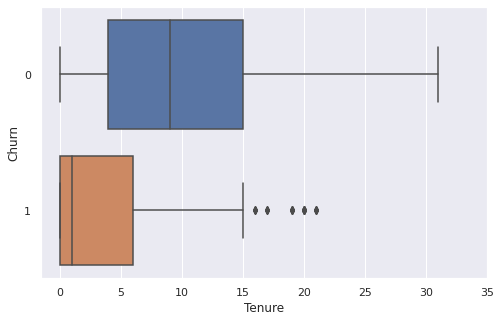

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Tenure', y='Churn', orient='h',data=df_clean_IQR)
plt.xticks(range(0,40,5))
plt.show()

**Analysis :**<br>
1. The line graph describes a rise of churn rate when tenure in the range 0-1. Meanwhile, when the tenure is larger than 1 churn rate is significantly decreasing.
2. Customer with tenure higher than 21 months indicates no churn.

### • Churn Rate vs Gender

In [ ]:
dfz = df_clean_IQR.copy()

In [ ]:
dfz1 = dfz.groupby(['Gender']).agg({'CustomerID' : 'nunique'}).reset_index()
dfz1 = dfz1.rename(columns={'CustomerID': 'CustUniq'})
dfz1

,Gender,CustUniq
0,Female,1589
1,Male,2451


In [ ]:
dfz2 = dfz.groupby(['Gender','Churn']).agg({'CustomerID' : 'nunique'}).reset_index()
dfz2

,Gender,Churn,CustomerID
0,Female,0,1332
1,Female,1,257
2,Male,0,1984
3,Male,1,467


In [ ]:
dfz_grouped =dfz1.merge(dfz2, on= 'Gender')
dfz_grouped['PercentChurn'] = round(dfz_grouped['CustomerID']/dfz_grouped['CustUniq']*100,2)
dfz_grouped

,Gender,CustUniq,Churn,CustomerID,PercentChurn
0,Female,1589,0,1332,83.83
1,Female,1589,1,257,16.17
2,Male,2451,0,1984,80.95
3,Male,2451,1,467,19.05


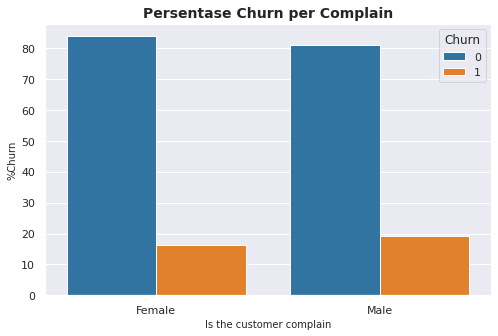

In [ ]:
# Percent Churn Based On Gender
plt.figure(figsize = (8,5))
plt.title('Persentase Churn per Complain', fontsize = 14, fontweight='bold')
ax = sns.barplot(x = 'Gender', y = 'PercentChurn', 
                 data = dfz_grouped,
                 palette="tab10",
                 hue = 'Churn')
ax.set(xlabel='Is the customer complain', ylabel='%Churn')
ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)
sns.set(style="darkgrid")
plt.show()

**Analysis :**<br>
1. It can be seen from the histogram that male customer is highly tend to churn, with a percentage of churn rate of 17%.
2. Meanwhile, the churn rate of female customer is 2% less than the male customer's.

### • Churn Rate vs Segmentasi Tenure

In [ ]:
dfz = df_clean_IQR.copy()
dfz.sample(5)

,CustomerID,Churn,Tenure,LoginDevice,CityTier,WarehouseToHome,PayMethod,Gender,HourSpendOnApp,DeviceRegistered,OrderCat,SatisfactionScore,Status,NumberOfAddress,Complain,%IncreaseOrderLY,CouponUsed,OrderCount,DaySinceLastOrder,Cashback
3485,53486,0,11.0,Phone,3,17.0,Debit Card,Female,3.0,5,Laptop&Acc,2,Married,4,1,15.0,1.0,2.0,1.0,192
1900,51901,0,9.0,Phone,3,16.0,E wallet,Male,2.0,3,Phone,4,Married,2,0,14.0,2.0,2.0,2.0,123
2077,52078,1,0.0,Computer,1,14.0,CC,Female,2.0,3,Phone,4,Single,1,0,17.0,0.0,1.0,2.0,124
63,50064,0,7.0,Computer,1,8.0,Debit Card,Male,2.0,4,Laptop&Acc,3,Divorced,2,0,17.0,0.0,1.0,9.0,195
3735,53736,0,14.0,Phone,1,9.0,CC,Male,4.0,4,Phone,3,Married,4,0,15.0,1.0,2.0,3.0,148


In [ ]:
dfz['TenureSegmentation'] = np.where(dfz['Tenure']>10, 'high', np.where(dfz['Tenure']<3, 'low','mid'))
dfz.sample(5)

,CustomerID,Churn,Tenure,LoginDevice,CityTier,WarehouseToHome,PayMethod,Gender,HourSpendOnApp,DeviceRegistered,OrderCat,SatisfactionScore,Status,NumberOfAddress,Complain,%IncreaseOrderLY,CouponUsed,OrderCount,DaySinceLastOrder,Cashback,TenureSegmentation
568,50569,1,0.0,Phone,3,9.0,Debit Card,Male,2.0,4,Fashion,2,Divorced,2,1,11.0,3.0,3.0,7.0,203,low
1330,51331,0,13.0,Phone,1,8.0,Debit Card,Male,3.0,4,Phone,3,Single,3,0,14.0,0.0,2.0,2.0,128,high
2742,52743,0,27.0,Phone,1,15.0,Debit Card,Female,3.0,3,Laptop&Acc,3,Married,4,0,11.0,1.0,2.0,3.0,129,high
3018,53019,0,7.0,Computer,3,17.0,E wallet,Male,3.0,5,Laptop&Acc,2,Single,5,0,15.0,2.0,2.0,2.0,172,mid
700,50701,0,2.0,Phone,1,14.0,CC,Male,3.0,4,Laptop&Acc,2,Divorced,2,1,13.0,0.0,1.0,2.0,151,low


In [ ]:
dfzg=dfz.groupby(['TenureSegmentation','Churn']).agg({'CustomerID':'nunique'}).reset_index().rename(columns={'CustomerID':'Total'})
dfzg

,TenureSegmentation,Churn,Total
0,high,0,1297
1,high,1,61
2,low,0,627
3,low,1,501
4,mid,0,1392
5,mid,1,162


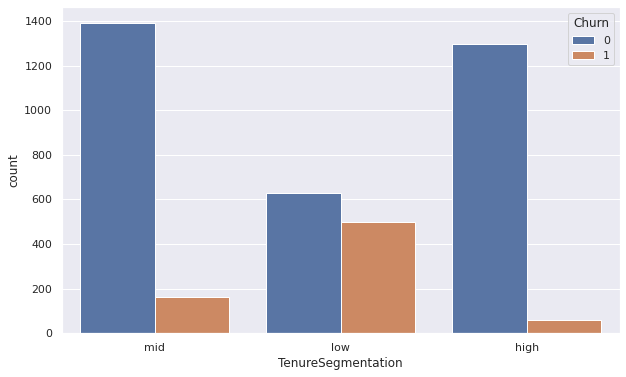

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='TenureSegmentation',hue='Churn',data=dfz)
plt.show()

# **3. DATA PREPARATION**

## a. Feature Engineering



In [ ]:
dfclean = df_clean_IQR.copy()

In [ ]:
#Drop CustomerID
dfclean.drop(columns = 'CustomerID', inplace=True)

In [ ]:
dfclean.columns

Index(['Churn', 'Tenure', 'LoginDevice', 'CityTier', 'WarehouseToHome',
       'PayMethod', 'Gender', 'HourSpendOnApp', 'DeviceRegistered', 'OrderCat',
       'SatisfactionScore', 'Status', 'NumberOfAddress', 'Complain',
       '%IncreaseOrderLY', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder',
       'Cashback'],
      dtype='object')

In [ ]:
cats3=['CityTier','LoginDevice', 'PayMethod', 'Gender', 'OrderCat', 'Status']
nums3=['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
       'DeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 
       '%IncreaseOrderLY', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'Cashback']

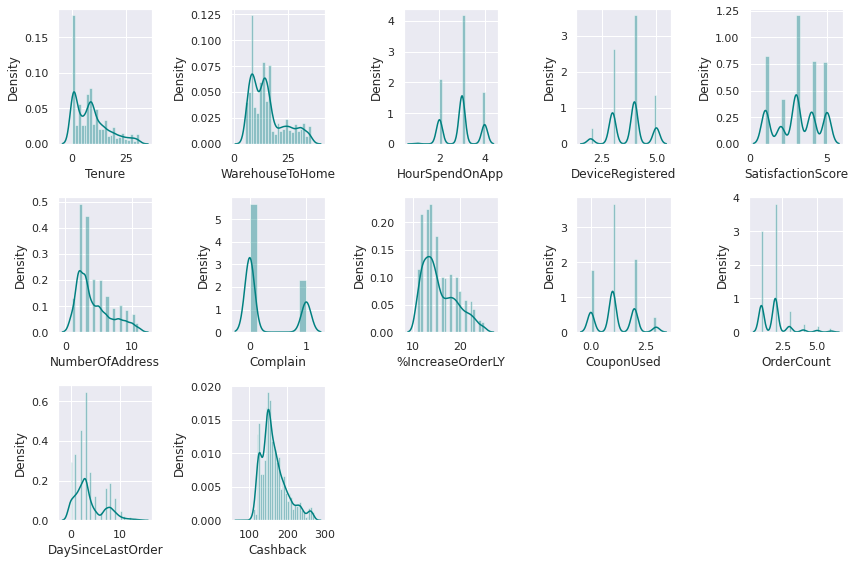

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(0, len(nums3)):
    sns.set_style('darkgrid')
    plt.subplot(3, 5, i+1)
    sns.distplot(x=dfclean[nums3[i]], color='teal')
    plt.xlabel(nums3[i])
    plt.tight_layout()

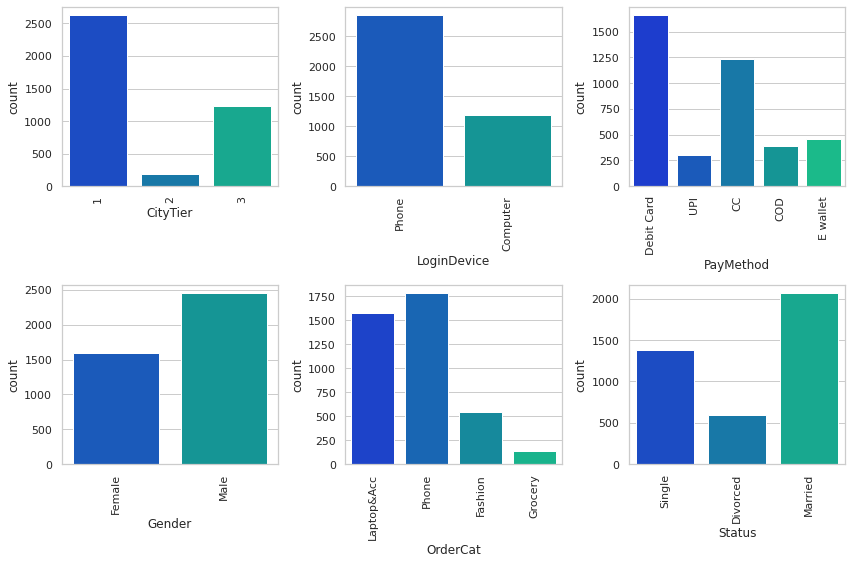

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(0, len(cats3)):
    sns.set_style('whitegrid')
    plt.subplot(2, 3, i+1)
    sns.countplot(x = dfclean[cats3[i]], palette = "winter", orient='v')
    plt.xticks(rotation=90)
    plt.tight_layout()

### Transform categorical feature `PayMethod` & `OrderCat` into three distinct values

In [ ]:
# Replace values in column
dfclean['PayMethod'].replace({"UPI": "Others", "E wallet": "Others", "COD": "Others"}, inplace=True)
dfclean['OrderCat'].replace({"Fashion": "Others", "Grocery": "Others"}, inplace=True)

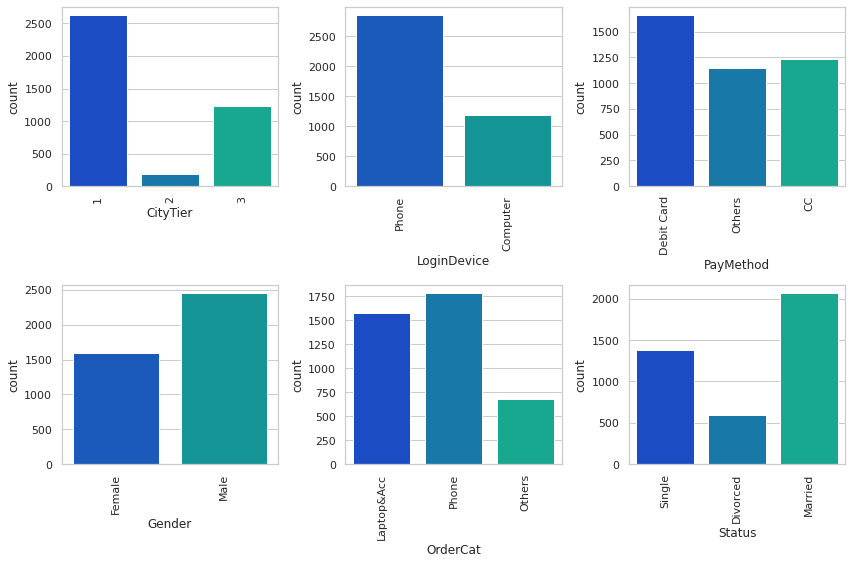

In [ ]:
# Recheck Categorical Features after transformation
plt.figure(figsize=(12, 8))
for i in range(0, len(cats3)):
    sns.set_style('whitegrid')
    plt.subplot(2, 3, i+1)
    sns.countplot(x = dfclean[cats3[i]], palette = "winter", orient='v')
    plt.xticks(rotation=90)
    plt.tight_layout()

###  Segmenting feature `Tenure` split into specific range of period

In [ ]:
dfclean[['Tenure']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,4040.0,8.972277,7.838695,0.0,2.0,8.0,13.0,31.0


In [ ]:
dfclean['TenureSegmentation'] = np.where(dfclean['Tenure']>=13,'high',np.where(dfclean['Tenure']<=2,'low','mid'))

In [ ]:
dfclean.sample(5)

,Churn,Tenure,LoginDevice,CityTier,WarehouseToHome,PayMethod,Gender,HourSpendOnApp,DeviceRegistered,OrderCat,SatisfactionScore,Status,NumberOfAddress,Complain,%IncreaseOrderLY,CouponUsed,OrderCount,DaySinceLastOrder,Cashback,TenureSegmentation
2162,0,9.0,Computer,1,24.0,Debit Card,Male,3.0,3,Laptop&Acc,1,Single,3,0,20.0,0.0,1.0,9.0,178,mid
1786,0,9.0,Computer,1,11.0,Others,Male,3.0,3,Phone,3,Married,5,0,17.0,0.0,2.0,0.0,121,mid
402,0,5.0,Phone,3,16.0,Others,Male,2.0,3,Laptop&Acc,2,Single,2,0,12.0,0.0,1.0,8.0,154,mid
687,0,16.0,Computer,1,33.0,Debit Card,Female,2.0,3,Others,5,Divorced,9,0,11.0,0.0,1.0,1.0,208,high
2384,1,0.0,Phone,2,15.0,Others,Female,3.0,3,Phone,3,Married,2,0,15.0,2.0,2.0,2.0,127,low


## b. Feature Encoding

One Hot Encoding: `LoginDevice`, `PayMethod`, `PreferedOrderCat`, `Status`, `CityTier`, `TenureSegmentation` <br>
Label Encoding : `Gender`

**One Hot Encoding :**

In [ ]:
df_encode = dfclean.copy()

In [ ]:
cats_select = ['LoginDevice', 'PayMethod', 'OrderCat', 'Status', 'CityTier','TenureSegmentation']

In [ ]:
for cat in cats_select:
    onehots = pd.get_dummies(df_encode[cat], prefix=cat)
    df_encode = df_encode.join(onehots)

In [ ]:
df_encode.columns

Index(['Churn', 'Tenure', 'LoginDevice', 'CityTier', 'WarehouseToHome',
       'PayMethod', 'Gender', 'HourSpendOnApp', 'DeviceRegistered', 'OrderCat',
       'SatisfactionScore', 'Status', 'NumberOfAddress', 'Complain',
       '%IncreaseOrderLY', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder',
       'Cashback', 'TenureSegmentation', 'LoginDevice_Computer',
       'LoginDevice_Phone', 'PayMethod_CC', 'PayMethod_Debit Card',
       'PayMethod_Others', 'OrderCat_Laptop&Acc', 'OrderCat_Others',
       'OrderCat_Phone', 'Status_Divorced', 'Status_Married', 'Status_Single',
       'CityTier_1', 'CityTier_2', 'CityTier_3', 'TenureSegmentation_high',
       'TenureSegmentation_low', 'TenureSegmentation_mid'],
      dtype='object')

**Drop the outdated columns**

In [ ]:
df_encode = df_encode.drop(columns=['LoginDevice', 'PayMethod', 'OrderCat', 'Status', 'CityTier','TenureSegmentation'])

In [ ]:
df_encode.shape

(4040, 31)

**Label Encoding :**

In [ ]:
mapping_gender = {'Male': 1, 'Female':0}
df_encode['Gender'] = df_encode['Gender'].map(mapping_gender)

In [ ]:
df_encode.sample(5)

,Churn,Tenure,WarehouseToHome,Gender,HourSpendOnApp,DeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,%IncreaseOrderLY,CouponUsed,OrderCount,DaySinceLastOrder,Cashback,LoginDevice_Computer,LoginDevice_Phone,PayMethod_CC,PayMethod_Debit Card,PayMethod_Others,OrderCat_Laptop&Acc,OrderCat_Others,OrderCat_Phone,Status_Divorced,Status_Married,Status_Single,CityTier_1,CityTier_2,CityTier_3,TenureSegmentation_high,TenureSegmentation_low,TenureSegmentation_mid
652,1,9.0,16.0,0,2.0,4,5,2,0,13.0,1.0,1.0,0.0,114,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1
3571,0,6.0,9.0,0,3.0,4,3,6,1,15.0,2.0,2.0,8.0,175,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1
3956,0,15.0,16.0,1,4.0,4,5,3,0,21.0,2.0,2.0,5.0,148,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0
1266,0,11.0,6.0,1,3.0,4,5,5,0,14.0,0.0,1.0,0.0,129,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
1321,0,7.0,34.0,0,3.0,4,3,2,0,21.0,1.0,1.0,7.0,167,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1


 **Split data into train and test**

In [ ]:
# Split features vs target
X = df_encode[[col for col in df_encode.columns if (str(df_encode[col].dtype) != 'object') and col not in ['Churn']]]
y = df_encode['Churn'].values 
print(X.shape)
print(y.shape)

(4040, 30)
(4040,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
print('Total rows & column of train set:',X_train.shape)
print('Total rows & column of test set:',X_test.shape)

Total rows & column of train set: (2828, 30)
Total rows & column of test set: (1212, 30)


In [ ]:
X_train.sample(3)

,Tenure,WarehouseToHome,Gender,HourSpendOnApp,DeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,%IncreaseOrderLY,CouponUsed,OrderCount,DaySinceLastOrder,Cashback,LoginDevice_Computer,LoginDevice_Phone,PayMethod_CC,PayMethod_Debit Card,PayMethod_Others,OrderCat_Laptop&Acc,OrderCat_Others,OrderCat_Phone,Status_Divorced,Status_Married,Status_Single,CityTier_1,CityTier_2,CityTier_3,TenureSegmentation_high,TenureSegmentation_low,TenureSegmentation_mid
218,2.0,16.0,0,2.0,4,4,2,1,14.0,0.0,1.0,7.0,183,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0
1347,9.0,8.0,1,3.0,4,3,7,1,15.0,0.0,1.0,0.0,121,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1
4825,21.0,9.0,0,4.0,5,1,3,1,19.0,1.0,2.0,3.0,158,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0


In [ ]:
X_test.sample(3)

,Tenure,WarehouseToHome,Gender,HourSpendOnApp,DeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,%IncreaseOrderLY,CouponUsed,OrderCount,DaySinceLastOrder,Cashback,LoginDevice_Computer,LoginDevice_Phone,PayMethod_CC,PayMethod_Debit Card,PayMethod_Others,OrderCat_Laptop&Acc,OrderCat_Others,OrderCat_Phone,Status_Divorced,Status_Married,Status_Single,CityTier_1,CityTier_2,CityTier_3,TenureSegmentation_high,TenureSegmentation_low,TenureSegmentation_mid
4484,4.0,35.0,0,4.0,4,1,3,0,14.0,2.0,2.0,10.0,183,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
3860,1.0,9.0,1,3.0,4,1,4,0,14.0,1.0,2.0,3.0,151,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0
4302,12.0,10.0,0,3.0,4,3,5,1,21.0,3.0,3.0,3.0,168,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1


## c. Normalization/Standardization

**Normalize - Standardize Train Set**

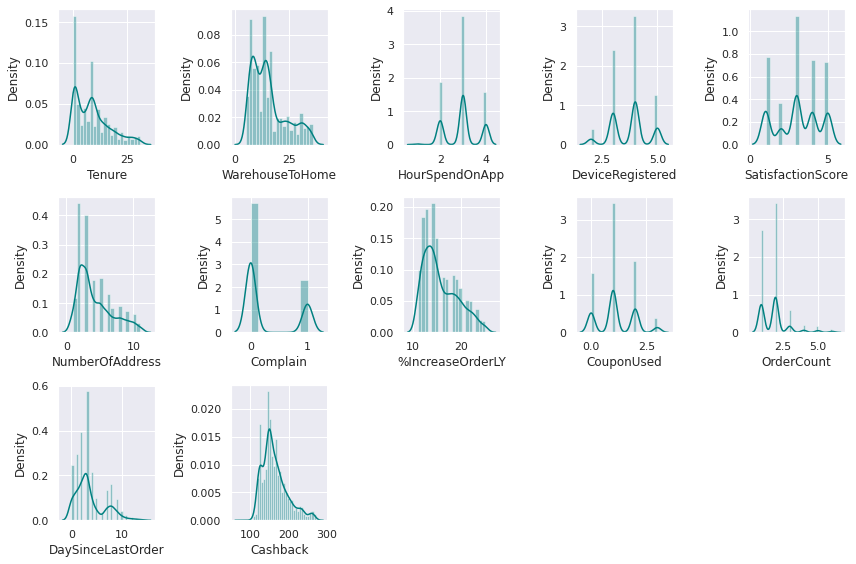

In [ ]:
# Recheck distribution
plt.figure(figsize=(12, 8))
for i in range(0, len(nums3)):
    sns.set_style('darkgrid')
    plt.subplot(3, 5, i+1)
    sns.distplot(x=X_train[nums3[i]], color='teal')
    plt.xlabel(nums3[i])
    plt.tight_layout();

In [ ]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,2828.0,8.928571,7.823657,0.0,2.0,8.0,13.0,31.0
WarehouseToHome,2828.0,15.637199,7.977812,5.0,9.0,14.0,20.0,36.0
Gender,2828.0,0.604668,0.489008,0.0,0.0,1.0,1.0,1.0
HourSpendOnApp,2828.0,2.947666,0.699754,1.0,2.0,3.0,3.0,4.0
DeviceRegistered,2828.0,3.733027,0.805762,2.0,3.0,4.0,4.0,5.0
SatisfactionScore,2828.0,3.079915,1.375661,1.0,2.0,3.0,4.0,5.0
NumberOfAddress,2828.0,4.230905,2.565603,1.0,2.0,3.0,6.0,11.0
Complain,2828.0,0.288190,0.453000,0.0,0.0,0.0,1.0,1.0
%IncreaseOrderLY,2828.0,15.691301,3.543529,11.0,13.0,15.0,18.0,25.0
CouponUsed,2828.0,1.152051,0.819081,0.0,1.0,1.0,2.0,3.0


Skewed :
*   Tenure
*   WarehouseToHome
*   NumberOfAddress
*   %IncreaseOrderLY
*   CouponUsed
*   DaySinceLastOrder
*   Cashback

Normal :
*   DeviceRegistered
*   HourSpendOnApp
*   SatisfactionScore
*   OrderCount






In [ ]:
skewed_0 =['Tenure','CouponUsed','DaySinceLastOrder']
skewed = ['WarehouseToHome','NumberOfAddress','%IncreaseOrderLY','Cashback']
normal = ['HourSpendOnApp','StatisfactionScore','OrderCount']

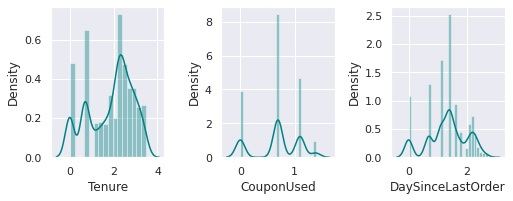

In [ ]:
# Check distribution after log trasform for column ['Tenure','CouponUsed','DaySinceLastOrder']
plt.figure(figsize=(12, 8))
for i in range(0, len(skewed_0)):
    sns.set_style('darkgrid')
    plt.subplot(3, 5, i+1)
    logt = np.log(X_train[skewed_0[i]]+1)
    sns.distplot(x=logt, color='teal')
    plt.xlabel(skewed_0[i])
    plt.tight_layout()

    #print('\nMean dari feature ke',i+1,'=',logt.mean())
    #print('Median dari feature ke',i+1,'=',logt.median())

    #Log Trasformation
    X_train['log_'+str(skewed_0[i])] = logt
    X_train = X_train.drop(columns=skewed_0[i])

In [ ]:
X_train.describe().transpose()[-3:]

,count,mean,std,min,25%,50%,75%,max
log_Tenure,2828.0,1.887911,1.008616,0.0,1.098612,2.197225,2.639057,3.465736
log_CouponUsed,2828.0,0.686068,0.415924,0.0,0.693147,0.693147,1.098612,1.386294
log_DaySinceLastOrder,2828.0,1.332455,0.670011,0.0,1.098612,1.386294,1.791759,2.708050


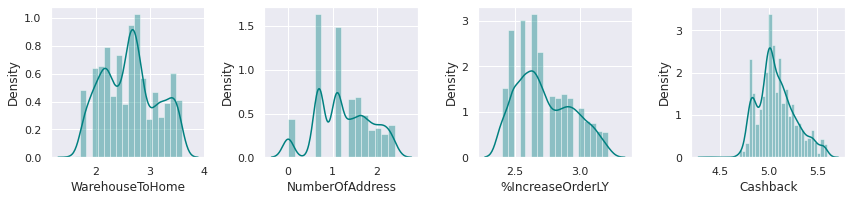

In [ ]:
# Check distribution after log trasform for column ['WarehouseToHome','NumberOfAddress','%IncreaseOrderLY','Cashback']
plt.figure(figsize=(12, 8))
for i in range(0, len(skewed)):
    sns.set_style('darkgrid')
    plt.subplot(3, 4, i+1)
    sns.distplot(x=np.log(X_train[skewed[i]]), color='teal')
    plt.xlabel(skewed[i])
    plt.tight_layout()

    #print('\nMean dari feature ke',i+1,'=',np.log(dfclean[skewed[i]]).mean())
    #print('Median dari feature ke',i+1,'=',np.log(dfclean[skewed[i]]).median())

    #Log Trasformation
    X_train['log_'+str(skewed[i])] = np.log(dfclean[skewed[i]])
    X_train = X_train.drop(columns=skewed[i])

In [ ]:
X_train.describe().transpose()[8:10]

,count,mean,std,min,25%,50%,75%,max
PayMethod_CC,2828.0,0.303041,0.459654,0.0,0.0,0.0,1.0,1.0
PayMethod_Debit Card,2828.0,0.410891,0.492083,0.0,0.0,0.0,1.0,1.0


**Standardization**



In [ ]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,2828.0,0.604668,0.489008,0.000000,0.000000,1.000000,1.000000,1.000000
HourSpendOnApp,2828.0,2.947666,0.699754,1.000000,2.000000,3.000000,3.000000,4.000000
DeviceRegistered,2828.0,3.733027,0.805762,2.000000,3.000000,4.000000,4.000000,5.000000
SatisfactionScore,2828.0,3.079915,1.375661,1.000000,2.000000,3.000000,4.000000,5.000000
Complain,2828.0,0.288190,0.453000,0.000000,0.000000,0.000000,1.000000,1.000000
OrderCount,2828.0,1.889675,0.997269,1.000000,1.000000,2.000000,2.000000,6.000000
LoginDevice_Computer,2828.0,0.294908,0.456082,0.000000,0.000000,0.000000,1.000000,1.000000
LoginDevice_Phone,2828.0,0.705092,0.456082,0.000000,0.000000,1.000000,1.000000,1.000000
PayMethod_CC,2828.0,0.303041,0.459654,0.000000,0.000000,0.000000,1.000000,1.000000
PayMethod_Debit Card,2828.0,0.410891,0.492083,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
to_std = ['HourSpendOnApp','DeviceRegistered','SatisfactionScore','OrderCount','log_Tenure', 
          'log_CouponUsed', 'log_DaySinceLastOrder', 'log_WarehouseToHome',
          'log_NumberOfAddress', 'log_%IncreaseOrderLY', 'log_Cashback']

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

for i in range(0,len(to_std)):
  X_train[to_std[i]] = StandardScaler().fit_transform(X_train[to_std[i]].values.reshape(len(X_train), 1))

In [ ]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,2828.0,6.046676e-01,0.489008,0.000000,0.000000,1.000000,1.000000,1.000000
HourSpendOnApp,2828.0,1.238548e-16,1.000177,-2.783853,-1.354525,0.074802,0.074802,1.504130
DeviceRegistered,2828.0,4.687434e-17,1.000177,-2.151174,-0.909892,0.331389,0.331389,1.572670
SatisfactionScore,2828.0,8.552408e-17,1.000177,-1.512206,-0.785154,-0.058102,0.668949,1.396001
Complain,2828.0,2.881895e-01,0.453000,0.000000,0.000000,0.000000,1.000000,1.000000
OrderCount,2828.0,2.053991e-16,1.000177,-0.892269,-0.892269,0.110647,0.110647,4.122311
LoginDevice_Computer,2828.0,2.949081e-01,0.456082,0.000000,0.000000,0.000000,1.000000,1.000000
LoginDevice_Phone,2828.0,7.050919e-01,0.456082,0.000000,0.000000,1.000000,1.000000,1.000000
PayMethod_CC,2828.0,3.030410e-01,0.459654,0.000000,0.000000,0.000000,1.000000,1.000000
PayMethod_Debit Card,2828.0,4.108911e-01,0.492083,0.000000,0.000000,0.000000,1.000000,1.000000


**Normalize - Standardize Test Set**

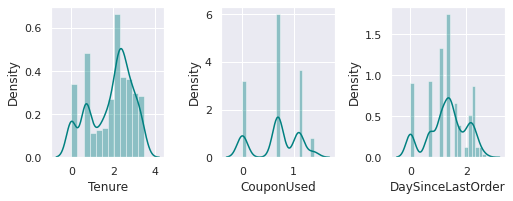

In [ ]:
# Check distribution after log trasform for column ['Tenure','CouponUsed','DaySinceLastOrder']
plt.figure(figsize=(12, 8))
for i in range(0, len(skewed_0)):
    sns.set_style('darkgrid')
    plt.subplot(3, 5, i+1)
    logt = np.log(X_test[skewed_0[i]]+1)
    sns.distplot(x=logt, color='teal')
    plt.xlabel(skewed_0[i])
    plt.tight_layout()

    #print('\nMean dari feature ke',i+1,'=',logt.mean())
    #print('Median dari feature ke',i+1,'=',logt.median())

    #Log Trasformation
    X_test['log_'+str(skewed_0[i])] = logt
    X_test = X_test.drop(columns=skewed_0[i])

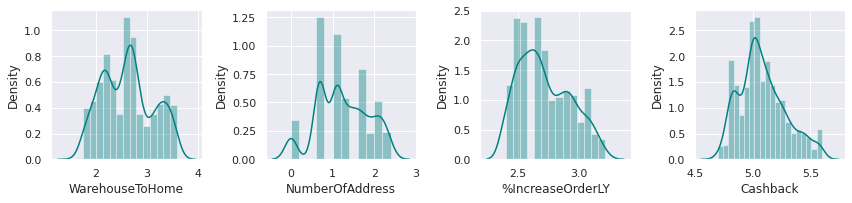

In [ ]:
# Check distribution after log trasform for column ['WarehouseToHome','NumberOfAddress','%IncreaseOrderLY','Cashback']
plt.figure(figsize=(12, 8))
for i in range(0, len(skewed)):
    sns.set_style('darkgrid')
    plt.subplot(3, 4, i+1)
    sns.distplot(x=np.log(X_test[skewed[i]]), color='teal')
    plt.xlabel(skewed[i])
    plt.tight_layout()

    #print('\nMean dari feature ke',i+1,'=',np.log(dfclean[skewed[i]]).mean())
    #print('Median dari feature ke',i+1,'=',np.log(dfclean[skewed[i]]).median())

    #Log Trasformation
    X_test['log_'+str(skewed[i])] = np.log(dfclean[skewed[i]])
    X_test = X_test.drop(columns=skewed[i])

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

for i in range(0,len(to_std)):
  X_test[to_std[i]] = StandardScaler().fit_transform(X_test[to_std[i]].values.reshape(len(X_test), 1))

## d. Feature Selection

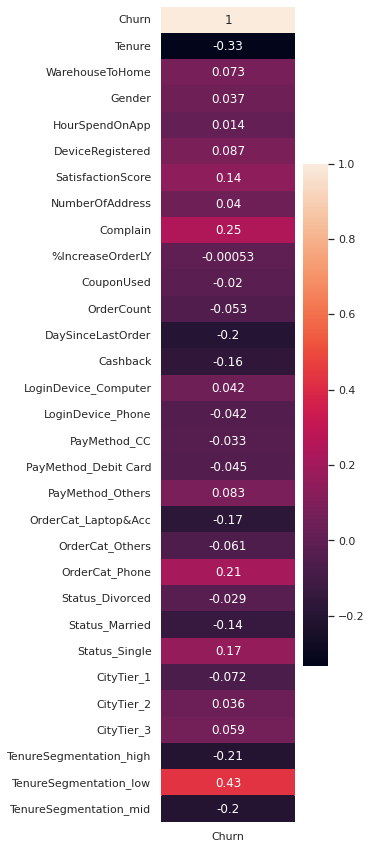

In [ ]:
plt.figure(figsize=(3,15))
sns.heatmap(df_encode.corr()[['Churn']], annot=True);

**Selected feature:**</br>
Target Label: `Churn`</br>
Numerical: `Tenure` `PreferredLoginDevice` `NumberOfDeviceRegistered` `SatisfactionScore` `Complain` `CashbackAmount` `DaySinceLastOrder`</br>
Categorical: `PreferredPaymentMode` `MaritalStatus` `PreferedOrderCat`

In [ ]:
X_train

,Gender,HourSpendOnApp,DeviceRegistered,SatisfactionScore,Complain,OrderCount,LoginDevice_Computer,LoginDevice_Phone,PayMethod_CC,PayMethod_Debit Card,PayMethod_Others,OrderCat_Laptop&Acc,OrderCat_Others,OrderCat_Phone,Status_Divorced,Status_Married,Status_Single,CityTier_1,CityTier_2,CityTier_3,TenureSegmentation_high,TenureSegmentation_low,TenureSegmentation_mid,log_Tenure,log_CouponUsed,log_DaySinceLastOrder,log_WarehouseToHome,log_NumberOfAddress,log_%IncreaseOrderLY,log_Cashback
2963,1,1.504130,0.331389,-0.785154,0,0.110647,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0.592001,0.017023,-0.349075,-0.124041,0.865266,-0.096694,0.880944
5387,1,1.504130,0.331389,-0.058102,0,0.110647,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,-0.095347,0.992051,0.413474,-0.866818,-0.263221,-0.096694,-0.023927
5202,1,0.074802,1.572670,-0.058102,0,0.110647,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1.047688,0.017023,0.413474,-0.285721,0.568435,-0.096694,-0.123592
2364,0,0.074802,0.331389,1.396001,0,-0.892269,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0.411205,0.017023,-0.349075,0.938628,0.568435,-0.756660,-0.157237
283,0,-2.783853,-0.909892,-0.785154,0,-0.892269,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1.358721,0.017023,0.413474,-0.653997,-0.263221,-0.756660,2.652625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,1,0.074802,-0.909892,0.668949,1,-0.892269,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,-1.872114,-1.649797,-0.954344,1.028418,-2.051831,0.200951,-1.076896
1744,1,0.074802,0.331389,1.396001,0,1.113563,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0.411205,1.683844,-0.349075,-1.685828,-0.923344,-1.125809,-1.451672
1154,1,-1.354525,-0.909892,0.668949,1,0.110647,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0.189928,0.017023,0.080370,0.025652,-0.923344,-1.125809,-1.408688
4867,1,1.504130,-2.151174,-0.058102,1,1.113563,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1.193065,0.992051,1.290909,1.028418,-0.263221,1.230066,0.477925


In [ ]:
# Drop Feature TenureSegmentation
X_train_selected1 = X_train.drop(columns=['TenureSegmentation_high', 'TenureSegmentation_low','TenureSegmentation_mid'])
X_test_selected1 = X_test.drop(columns=['TenureSegmentation_high', 'TenureSegmentation_low','TenureSegmentation_mid'])

X_train_selected1

,Gender,HourSpendOnApp,DeviceRegistered,SatisfactionScore,Complain,OrderCount,LoginDevice_Computer,LoginDevice_Phone,PayMethod_CC,PayMethod_Debit Card,PayMethod_Others,OrderCat_Laptop&Acc,OrderCat_Others,OrderCat_Phone,Status_Divorced,Status_Married,Status_Single,CityTier_1,CityTier_2,CityTier_3,log_Tenure,log_CouponUsed,log_DaySinceLastOrder,log_WarehouseToHome,log_NumberOfAddress,log_%IncreaseOrderLY,log_Cashback
2963,1,1.504130,0.331389,-0.785154,0,0.110647,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0.592001,0.017023,-0.349075,-0.124041,0.865266,-0.096694,0.880944
5387,1,1.504130,0.331389,-0.058102,0,0.110647,0,1,0,1,0,0,0,1,0,1,0,1,0,0,-0.095347,0.992051,0.413474,-0.866818,-0.263221,-0.096694,-0.023927
5202,1,0.074802,1.572670,-0.058102,0,0.110647,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1.047688,0.017023,0.413474,-0.285721,0.568435,-0.096694,-0.123592
2364,0,0.074802,0.331389,1.396001,0,-0.892269,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0.411205,0.017023,-0.349075,0.938628,0.568435,-0.756660,-0.157237
283,0,-2.783853,-0.909892,-0.785154,0,-0.892269,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1.358721,0.017023,0.413474,-0.653997,-0.263221,-0.756660,2.652625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,1,0.074802,-0.909892,0.668949,1,-0.892269,0,1,0,0,1,0,0,1,0,1,0,1,0,0,-1.872114,-1.649797,-0.954344,1.028418,-2.051831,0.200951,-1.076896
1744,1,0.074802,0.331389,1.396001,0,1.113563,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0.411205,1.683844,-0.349075,-1.685828,-0.923344,-1.125809,-1.451672
1154,1,-1.354525,-0.909892,0.668949,1,0.110647,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0.189928,0.017023,0.080370,0.025652,-0.923344,-1.125809,-1.408688
4867,1,1.504130,-2.151174,-0.058102,1,1.113563,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1.193065,0.992051,1.290909,1.028418,-0.263221,1.230066,0.477925


## e. Class Imbalance

In [ ]:
# Target Value Distribution
df_encode_a = df_encode.groupby('Churn').agg(Population = ('Churn','count'))
df_encode_a.reset_index(inplace=True)

df_encode_a['%Churn'] = round(100 * df_encode_a['Population']/df_encode_a['Population'].sum(), 2)

df_encode_a

,Churn,Population,%Churn
0,0,3316,82.08
1,1,724,17.92


**The data seems to be imbalance (the ratio 18:82), so the lesser value (churn or 1) need to be treated - synthesize data using SMOTE**

In [ ]:
from imblearn import under_sampling, over_sampling
x_under, y_under = under_sampling.RandomUnderSampler(0.33).fit_resample(X_train_selected1, y_train)
x_over, y_over = over_sampling.RandomOverSampler(0.33).fit_resample(X_train_selected1, y_train)
x_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.33).fit_resample(X_train_selected1, y_train)

In [ ]:
print('ORIGINAL DATA')
print(pd.Series(y_train).value_counts())
print('---'*10, '\n')
print('UNDERSAMPLING DATA')
print(pd.Series(y_under).value_counts())
print('---'*10, '\n')
print('OVERSAMPLING DATA')
print(pd.Series(y_over).value_counts())
print('---'*10, '\n')
print('SMOTE DATA')
print(pd.Series(y_over_SMOTE).value_counts())
print('---'*10, '\n')

ORIGINAL DATA
0    2319
1     509
dtype: int64
------------------------------ 

UNDERSAMPLING DATA
0    1542
1     509
dtype: int64
------------------------------ 

OVERSAMPLING DATA
0    2319
1     765
dtype: int64
------------------------------ 

SMOTE DATA
0    2319
1     765
dtype: int64
------------------------------ 



In [ ]:
X_train_selected1, y_train = x_over_SMOTE, y_over_SMOTE

# **4. MODELLING**

In [ ]:
#Function Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model,  y_train_pred, y_test_pred, y_train, y_test):
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_train_pred))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_test_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_train_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_test_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_train_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_test_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_train_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_test_pred))
    
    fpr, tpr, thresholds = roc_curve(y_train, y_train_pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC (Train Set): %.2f" % auc(fpr, tpr))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC (Test Set): %.2f" % auc(fpr, tpr))

## **Logistic Regression**



In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=2)
logreg.fit(X_train_selected1, y_train)

y_pred_train = logreg.predict(X_train_selected1)
y_pred = logreg.predict(X_test_selected1)

# Check Model Performance
eval_classification(logreg, y_pred_train, y_pred, y_train, y_test)

Accuracy (Train Set): 0.89
Accuracy (Test Set): 0.88
Precision (Train Set): 0.82
Precision (Test Set): 0.71
Recall (Train Set): 0.71
Recall (Test Set): 0.59
F1-Score (Train Set): 0.76
F1-Score (Test Set): 0.64
AUC (Train Set): 0.83
AUC (Test Set): 0.77


### Hyperparameter Tuning with Random Search/Grid Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
logres = LogisticRegression(random_state=42)
model_log = RandomizedSearchCV(logres, hyperparameters, cv=3, random_state=42, scoring='recall')

# Fitting Model & Evaluation
model.fit(X_train_selected1, y_train)
y_pred = model.predict(X_test_selected1)
eval_classification(model_log, y_pred_train, y_pred, y_train, y_test)

Accuracy (Train Set): 0.89
Accuracy (Test Set): 0.86
Precision (Train Set): 0.82
Precision (Test Set): 0.82
Recall (Train Set): 0.71
Recall (Test Set): 0.28
F1-Score (Train Set): 0.76
F1-Score (Test Set): 0.42
AUC (Train Set): 0.83
AUC (Test Set): 0.63


## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_selected1,y_train)

y_pred = model_dt.predict(X_test_selected1)
y_pred_train = model_dt.predict(X_train_selected1)

In [ ]:
# Check Model Performance
eval_classification(model_dt,  y_pred_train, y_pred, y_train, y_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.81
Precision (Train Set): 1.00
Precision (Test Set): 0.47
Recall (Train Set): 1.00
Recall (Test Set): 0.82
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.60
AUC (Train Set): 1.00
AUC (Test Set): 0.81


### Hyperparameter Tuning with Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [10, 20, 50, 100] # Maximum number of levels in tree
min_samples_split = [10, 20, 40, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 4, 8, 16, 32, 64, 128] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Initiate Model
dt = DecisionTreeClassifier(random_state=42)
model_dt_tuned = RandomizedSearchCV(dt, hyperparameters, cv=3, random_state=42,n_iter=20,verbose = 500, scoring='recall')
model_dt_tuned.fit(X_train_selected1, y_train)

# Predict & Evaluation
y_pred = model_dt_tuned.predict(X_test_selected1)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3; 1/20] START max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=20
[CV 1/3; 1/20] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=20;, score=0.424 total time=   0.0s
[CV 2/3; 1/20] START max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=20
[CV 2/3; 1/20] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=20;, score=0.565 total time=   0.0s
[CV 3/3; 1/20] START max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=20
[CV 3/3; 1/20] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=20;, score=0.604 total time=   0.0s
[CV 1/3; 2/20] START max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10
[CV 1/3; 2/20] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10;, score=0.624 total time=   0.0s
[CV 2/3; 2/20] START max_depth=20, max_features=sqrt, m

In [ ]:
# Check Model Performance after Hyperparameter Tuning
eval_classification(model_dt_tuned,  y_pred_train, y_pred, y_train, y_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.89
Precision (Train Set): 1.00
Precision (Test Set): 0.69
Recall (Train Set): 1.00
Recall (Test Set): 0.64
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.67
AUC (Train Set): 1.00
AUC (Test Set): 0.79


In [ ]:
print('Best max_depth:', model_dt_tuned.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model_dt_tuned.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model_dt_tuned.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model_dt_tuned.best_estimator_.get_params()['max_features'])
print('Best criterion:', model_dt_tuned.best_estimator_.get_params()['criterion'])
print('Best splitter:', model_dt_tuned.best_estimator_.get_params()['splitter'])

Best max_depth: 20
Best min_samples_split: 10
Best min_samples_leaf: 1
Best max_features: sqrt
Best criterion: gini
Best splitter: best


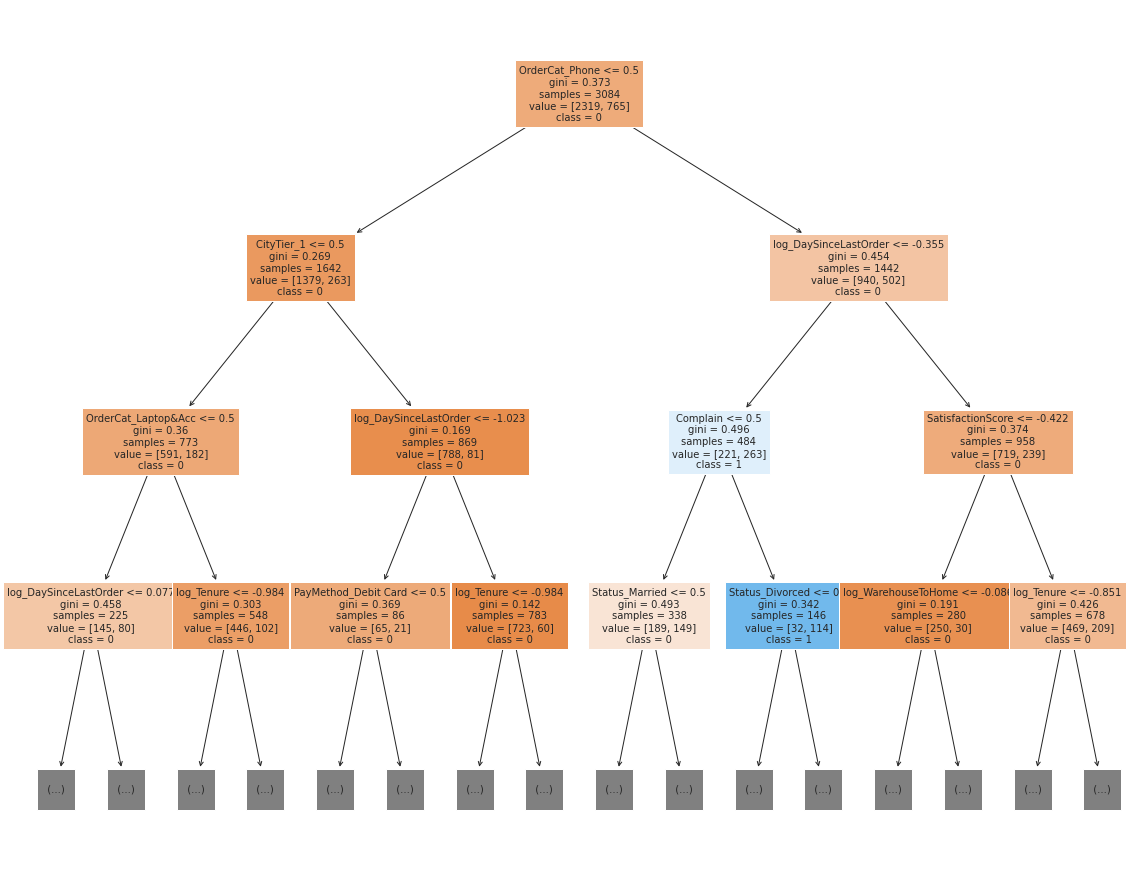

In [ ]:
# Showing Decision Tree
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 16))
tree.plot_tree(model_dt_tuned.best_estimator_,
               feature_names = X_test_selected1.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=3, fontsize=10)
plt.show();

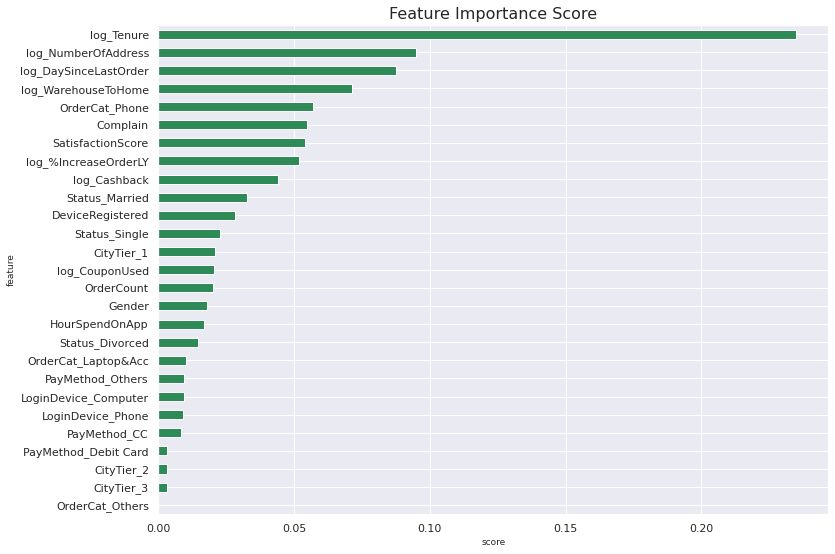

In [ ]:
# Visualize the feature importance
feat_importances = pd.Series(model_dt_tuned.best_estimator_.feature_importances_, index=X_test_selected1.columns)
ax = feat_importances.nlargest(100).plot(kind='barh', figsize=(12, 9), color = 'seagreen')
ax.invert_yaxis()

plt.xlabel('score', size = 9)
plt.ylabel('feature', size = 9)
plt.title('Feature Importance Score', size = 16);

## **K-Nearest Neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=42)
knn.fit(X_train_selected1,y_train)

y_pred_knn = knn.predict(X_test_selected1)
y_pred_train_knn=knn.predict(X_train_selected1)

In [ ]:
eval_classification(knn, y_pred_train_knn, y_pred_knn, y_train, y_test)

Accuracy (Train Set): 0.85
Accuracy (Test Set): 0.86
Precision (Train Set): 0.82
Precision (Test Set): 0.70
Recall (Train Set): 0.52
Recall (Test Set): 0.39
F1-Score (Train Set): 0.64
F1-Score (Test Set): 0.50
AUC (Train Set): 0.74
AUC (Test Set): 0.79


Berdasarkan nilai metrics scorenya, terlihat bahwa data train overfitting karena score train set lebih besar dari test set. Untuk mengatasi hal tersebut, dapat dilakukan hyperparameter tuning

### Hyperparameter Tuning with Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,10))
n_neighbors = list(range(1,10))
p=[1,1]

In [ ]:
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=3)

In [ ]:
#Fit the model
best_model = clf.fit(X_train_selected1,y_train)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


In [ ]:
# Check Model Performance after Hyperparameter Tuning
eval_classification(best_model,  y_pred_train, y_pred, y_train, y_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.89
Precision (Train Set): 1.00
Precision (Test Set): 0.69
Recall (Train Set): 1.00
Recall (Test Set): 0.64
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.67
AUC (Train Set): 1.00
AUC (Test Set): 0.79


## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_selected1, y_train)

y_pred = model_rf.predict(X_test_selected1)
y_pred_train = model_rf.predict(X_train_selected1)

eval_classification(model_rf,  y_pred_train, y_pred, y_train, y_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.94
Precision (Train Set): 1.00
Precision (Test Set): 0.90
Recall (Train Set): 1.00
Recall (Test Set): 0.75
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.82
AUC (Train Set): 1.00
AUC (Test Set): 0.87


### Hyperparameter Tuning with Random Search/Grid Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score

hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 10)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(2, 150)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 20, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 20, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       
                       n_jobs = [-1,], # Core untuk parallel computation. -1 untuk menggunakan semua core
                       
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=4, random_state=42, scoring='precision')
rf_tuned.fit(X_train_selected1,y_train)

#evaluation
y_pred_tuned = rf_tuned.predict(X_test_selected1)
y_pred_train_tuned = rf_tuned.predict(X_train_selected1)

eval_classification(rf_tuned,  y_pred_train_tuned, y_pred_tuned, y_train, y_test)

y_pred_proba_tuned = rf_tuned.predict_proba(X_test_selected1)
y_pred_train_proba_tuned = rf_tuned.predict_proba(X_train_selected1)
print('AUC Proba (Train) :' +str(roc_auc_score(y_train,y_pred_train_proba_tuned[:, 1])))
print('AUC Proba (Test) :' +str(roc_auc_score(y_test,y_pred_proba_tuned[:, 1])))

print('AUC (Train) :' + str(roc_auc_score(y_train, y_pred_train_tuned)))
print('AUC (Test) :' + str(roc_auc_score(y_test, y_pred_tuned)))

print('F1 (Train) :' +str(f1_score(y_train, y_pred_train_tuned)))
print('F1 (Test) :' +str(f1_score(y_test, y_pred_tuned)))


Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.93
Precision (Train Set): 1.00
Precision (Test Set): 0.87
Recall (Train Set): 0.98
Recall (Test Set): 0.73
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.79
AUC (Train Set): 0.99
AUC (Test Set): 0.87
AUC Proba (Train) :0.9999904173254754
AUC Proba (Test) :0.9671199645447972
AUC (Train) :0.9908496732026144
AUC (Test) :0.8535816752583333
F1 (Train) :0.9907651715039577
F1 (Test) :0.7949367088607595


In [ ]:
rf_tuned.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 38,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 1115,
 'n_jobs': -1}

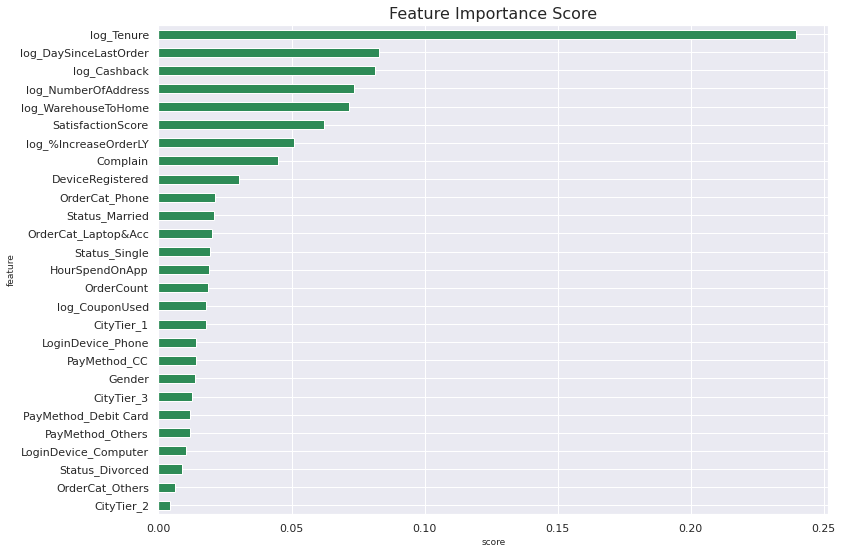

In [ ]:
# Visualize the feature importance
feat_importances = pd.Series(rf_tuned.best_estimator_.feature_importances_, index=X_test_selected1.columns)
ax = feat_importances.nlargest(100).plot(kind='barh', figsize=(12, 9), color = 'seagreen')
ax.invert_yaxis()

plt.xlabel('score', size = 9)
plt.ylabel('feature', size = 9)
plt.title('Feature Importance Score', size = 16);

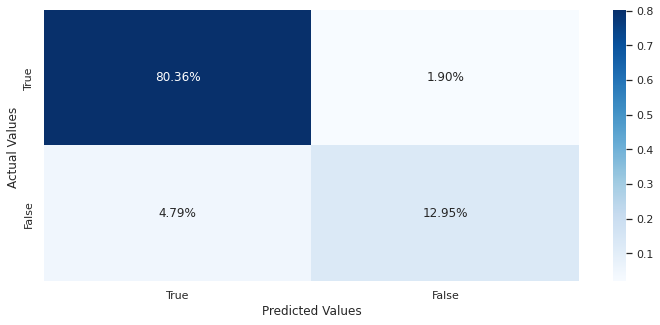

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred_tuned)
cf_matrix

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

plt.show()

## XGBoost

In [ ]:
from xgboost import XGBClassifier, XGBRegressor
xg = XGBClassifier(random_state=42)
xg.fit(X_train_selected1, y_train)

y_pred_train = xg.predict(X_train_selected1)
y_pred = xg.predict(X_test_selected1)

# Check Model Performance
eval_classification(xg,  y_pred_train, y_pred, y_train, y_test)

Accuracy (Train Set): 0.93
Accuracy (Test Set): 0.90
Precision (Train Set): 0.90
Precision (Test Set): 0.69
Recall (Train Set): 0.82
Recall (Test Set): 0.77
F1-Score (Train Set): 0.86
F1-Score (Test Set): 0.73
AUC (Train Set): 0.90
AUC (Test Set): 0.85


Overfit

There are in general two ways that you can control overfitting in XGBoost:

The first way is to directly control model complexity.

This includes `max_depth`, `min_child_weight` and `gamma`.

The second way is to add randomness to make training robust to noise.

This includes `subsample` and `colsample_bytree`.

You can also reduce stepsize `eta`. Remember to increase `num_round` when you do so.

### Hyperparameter Tuning with Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


hyperparameters = {
                    'max_depth' : [3],
                    'min_child_weight' : [1,2,3],
                    'gamma' : [1],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 0.5, num = 200)],
                    'num_round':[int(x) for x in np.linspace(0,500, num = 500)],

                    'lambda' : [float(x) for x in np.linspace(0, 0.5, num = 100)]
                    }


from xgboost import XGBClassifier, XGBRegressor
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=3, random_state=42, scoring='recall')
xg_tuned.fit(X_train_selected1, y_train)

y_pred_train = xg_tuned.predict(X_train_selected1)
y_pred = xg_tuned.predict(X_test_selected1)

eval_classification(xg,  y_pred_train, y_pred, y_train, y_test)

Accuracy (Train Set): 0.93
Accuracy (Test Set): 0.88
Precision (Train Set): 0.90
Precision (Test Set): 0.62
Recall (Train Set): 0.81
Recall (Test Set): 0.81
F1-Score (Train Set): 0.85
F1-Score (Test Set): 0.71
AUC (Train Set): 0.89
AUC (Test Set): 0.85


### Feature Importance

In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [ ]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 3
Best min_child_weight: 3
Best gamma: 1
Best tree_method: approx
Best colsample_bytree: 0.6000000000000001
Best eta: 0.28391959798994976
Best num_round: 103
Best lambda: 0.03535353535353536
Best alpha: 0.0


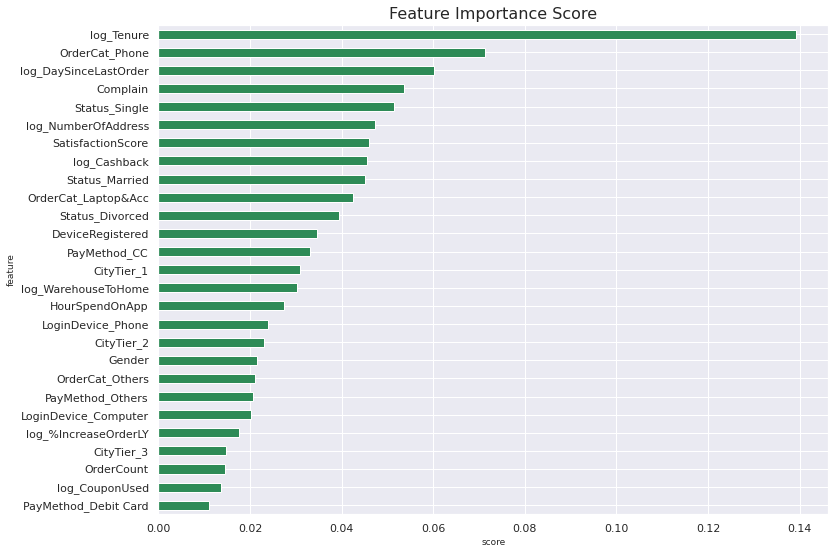

In [ ]:
# Visualize the feature importance
feat_importances = pd.Series(xg_tuned.best_estimator_.feature_importances_, index=X_test_selected1.columns)
ax = feat_importances.nlargest(100).plot(kind='barh', figsize=(12, 9), color = 'seagreen')
ax.invert_yaxis()

plt.xlabel('score', size = 9)
plt.ylabel('feature', size = 9)
plt.title('Feature Importance Score', size = 16);

## Iterasi Model dengan Top Features

In [ ]:
# Split selected features vs target
Xfinal = df_encode[[col for col in df_encode.columns if (str(df_encode[col].dtype) != 'object') and col not in ['Churn']]]
yfinal = df_encode['Churn'].values 
print(Xfinal.shape)
print(yfinal.shape)

(4040, 30)
(4040,)


In [ ]:
from sklearn.model_selection import train_test_split
X_trainfinal, X_testfinal, y_trainfinal, y_testfinal = train_test_split(Xfinal,yfinal,test_size=0.3, random_state=42)

In [ ]:
# Drop Feature TenureSegmentation
X_train_selectedfinal = X_train[['log_Tenure','OrderCat_Phone','log_DaySinceLastOrder']]
X_test_selectedfinal = X_test[['log_Tenure','OrderCat_Phone','log_DaySinceLastOrder']]

X_train_selectedfinal

,log_Tenure,OrderCat_Phone,log_DaySinceLastOrder
2963,0.592001,0,-0.349075
5387,-0.095347,1,0.413474
5202,1.047688,1,0.413474
2364,0.411205,0,-0.349075
283,1.358721,0,0.413474
...,...,...,...
1515,-1.872114,1,-0.954344
1744,0.411205,1,-0.349075
1154,0.189928,1,0.080370
4867,1.193065,0,1.290909


In [ ]:
print('Total rows & column of train set:',X_train_selectedfinal.shape)
print('Total rows & column of test set:',X_test_selectedfinal.shape)

Total rows & column of train set: (2828, 3)
Total rows & column of test set: (1212, 3)


In [ ]:
from imblearn import under_sampling, over_sampling
x_under, y_under = under_sampling.RandomUnderSampler(0.33).fit_resample(X_train_selectedfinal, y_trainfinal)
x_over, y_over = over_sampling.RandomOverSampler(0.33).fit_resample(X_train_selectedfinal, y_trainfinal)
x_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.33).fit_resample(X_train_selectedfinal, y_trainfinal)

In [ ]:
print('ORIGINAL DATA')
print(pd.Series(y_train).value_counts())
print('---'*10, '\n')
print('UNDERSAMPLING DATA')
print(pd.Series(y_under).value_counts())
print('---'*10, '\n')
print('OVERSAMPLING DATA')
print(pd.Series(y_over).value_counts())
print('---'*10, '\n')
print('SMOTE DATA')
print(pd.Series(y_over_SMOTE).value_counts())
print('---'*10, '\n')

ORIGINAL DATA
0    2319
1     765
dtype: int64
------------------------------ 

UNDERSAMPLING DATA
0    1542
1     509
dtype: int64
------------------------------ 

OVERSAMPLING DATA
0    2319
1     765
dtype: int64
------------------------------ 

SMOTE DATA
0    2319
1     765
dtype: int64
------------------------------ 



In [ ]:
X_train_selectedfinal, y_trainfinal = x_over_SMOTE, y_over_SMOTE

In [ ]:
from xgboost import XGBClassifier, XGBRegressor
xg = XGBClassifier(random_state=42)
xg.fit(X_train_selectedfinal, y_trainfinal)

y_pred_train = xg.predict(X_train_selectedfinal)
y_pred = xg.predict(X_train_selectedfinal)

# Check Model Performance
eval_classification(xg,  y_pred_train, y_pred, y_trainfinal, y_testfinal)

Accuracy (Train Set): 0.83


ValueError: ignored

In [ ]:
print('precision (Train) :' + str(precision_score(y_train, y_pred_train_tuned)))
print('precision (Test) :' + str(precision_score(y_test, y_pred_tuned)))
print('recall (Train) :' + str(recall_score(y_train, y_pred_train_tuned)))
print('recall (Test) :' + str(recall_score(y_test, y_pred_tuned)))
print('AUC (Train) :' + str(roc_auc_score(y_trainfinal, y_pred_train_tuned)))
print('AUC (Test) :' + str(roc_auc_score(y_testfinal, y_pred_tuned)))

precision (Train) :1.0
precision (Test) :0.8722222222222222
recall (Train) :0.9816993464052287
recall (Test) :0.7302325581395349
AUC (Train) :0.9908496732026144
AUC (Test) :0.8535816752583333


Overfit

There are in general two ways that you can control overfitting in XGBoost:

The first way is to directly control model complexity.

This includes `max_depth`, `min_child_weight` and `gamma`.

The second way is to add randomness to make training robust to noise.

This includes `subsample` and `colsample_bytree`.

You can also reduce stepsize `eta`. Remember to increase `num_round` when you do so.

### Hyperparameter Tuning with Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


hyperparameters = {
                    'max_depth' : [3],
                    'min_child_weight' : [1,2,3],
                    'gamma' : [1],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 0.5, num = 200)],
                    'num_round':[int(x) for x in np.linspace(0,500, num = 500)],

                    'lambda' : [float(x) for x in np.linspace(0, 0.5, num = 100)]
                    }


from xgboost import XGBClassifier, XGBRegressor
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=3, random_state=42, scoring='recall')
xg_tuned.fit(X_train_selectedfinal, y_train)

y_pred_train = xg_tuned.predict(X_train_selectedfinal)
y_pred = xg_tuned.predict(X_train_selectedfinal)

eval_classification(xg,  y_pred_train, y_pred, y_train, y_test)

Accuracy (Train Set): 0.82


ValueError: ignored